# _TP especial Fundamentos de la Ciencia de Datos_<br>
### _Grupo 7: Buralli, Todesco, Antúnez_


## <u>Descarga y lectura de archivos<u>

Empezaremos descargando y leyendo los archivos mandados por la cátedra

In [1]:
#Librerias que utilizaremos más tarde
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# importamos wget y las librerías que nos faltan para la descarga
from wget import download
from os import path

# Descargamos el archivo de las canciones
if not path.exists("Covers.csv"):
  download("https://raw.githubusercontent.com/Arimochin/TPE-FundamentosCienciaDatos/main/Covers.csv")
else:
  print("No se descargará el archivo de las canciones porque ya existe en la carpeta")
# abrimos el archivo usando una función específica de pandas
covers_dataset = pd.read_csv("Covers.csv")

No se descargará el archivo de las canciones porque ya existe en la carpeta


Hacemos una vista general para saber de que se trata el dataset, que significan cada una de sus columnas

In [2]:
covers_dataset.head()

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year
0,Everybody Everybody,Black Box,4:11,4,0.645,0.795,7,-12.095,1,0.0527,0.3470,0.003890,0.1040,0.535,112.067,87,1990
1,Close To You,Maxi Priest,3:45,4,0.590,0.727,6,-7.955,1,0.0706,0.0259,0.000065,0.0827,0.356,121.966,85,1990
2,Do Me!,Bell Biv DeVoe,3:56,4,0.615,0.534,9,-6.719,0,0.0386,0.1060,0.000018,0.0607,0.193,135.917,84,1990
3,Everything,Jody Watley,4:05,4,0.704,0.225,6,-14.454,0,0.0994,0.9020,0.657000,0.1060,0.243,120.006,82,1990
4,What It Takes,Aerosmith,3:21,4,0.672,0.655,10,-5.021,0,0.0310,0.0362,0.000000,0.1170,0.555,134.948,82,1990


## <u>Descripción de las variables<u>
* ```Track```: nombre de la canción
* ```Artist```: nombre del artista o intérprete
* ```Duration```: duración en minutos de la canción
* ```Time_Signature```: número de pulsaciones por compás
* ```Danceability```: medida de que tan bailable es la canción(entre 0 y 1)
* ```Energy```: medida de que tan enérgica es la canción(entre 0 y 1)
* ```Key```: tonalidad de la canción, número entero
* ```Loudness```: volumen de la canción, en decibelios
* ```Mode```: tono mayor o menor(0 o 1, respectivamente)
* ```Speechiness```: medida de presencia de palabras habladas en las canciones, valores altos indican una alta presencia de estas palabras
* ```Acoustiness```: mide que tan acústica es la pista
* ```Instrumentalness```: mide la presencia de voces en las canciones, valores más altos indican una canción con mayor parte instrumental
* ```Liveness```: probabilidad de que dicha canción se haya interpretado en vivo, niveles más altos indican mayor presencia de voces de la audiencia
* ```Valance```: medida de la positividad de la canción, niveles más altos indican presencias de melodías alegres
* ```Tempo```: velocidad de la pista, medida en beats por minutos(BPM)
* ```Popularity```: puntuación de la canción que mide su popularidad
* ```Year```: año de lanzamiento

Identificaremos la cantidad de nulos mediante el comando ```isna()```

In [3]:
covers_dataset.isna().sum()

Track               0
Artist              0
Duration            0
Time_Signature      0
Danceability        0
Energy              0
Key                 0
Loudness            0
Mode                0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Popularity          0
Year                0
dtype: int64

Observamos que no hay NaNs, pero esto no descarta la presencia de valores extraños a analizar en las distintas columnas, por lo que verificaremos mediante el método ```value_count()```

## <u>Revision de valores<u>

In [4]:
covers_dataset["Track"].value_counts()

Track
Hold On                     3
Lately                      2
Stay                        2
Angel                       2
Anything                    2
                           ..
I’m Your Angel              1
Taking Everything           1
What’s It Gonna Be?!        1
Almost Doesn’t Count        1
We Didn’t Start The Fire    1
Name: count, Length: 892, dtype: int64

En ```Track``` parece no haber presencia de valores raros, si algunos nombres repetidos.

In [5]:
covers_dataset["Artist"].value_counts()

Artist
Mariah Carey                    16
Madonna                         14
Janet Jackson                   13
Boyz II Men                     11
Whitney Houston                 10
                                ..
Lou Bega                         1
Christina Aguilera               1
Mariah Carey featuring Jay-Z     1
Mark Chesnutt                    1
Tal Bachman                      1
Name: count, Length: 535, dtype: int64

Con ```Artist``` parace algo similar, nada extraño a primera vista

In [6]:
covers_dataset["Duration"].value_counts()

Duration
3:48    12
3:55    12
4:18    11
3:59    11
3:38    10
        ..
4:06     1
2:55     1
2:46     1
2:07     1
4:46     1
Name: count, Length: 253, dtype: int64

```Duration``` tampoco parece tener valores atípicos, aunque luego habría que convertir el dato a algo numérico.

In [7]:
covers_dataset['Time_Signature'].value_counts()

Time_Signature
4    865
3     45
5      6
1      3
Name: count, dtype: int64

```Time_Signature``` parece correcto.

In [8]:
covers_dataset['Danceability'].value_counts()

Danceability
0.648    7
0.612    6
0.679    6
0.547    6
0.765    6
        ..
0.882    1
0.465    1
0.830    1
0.393    1
0.600    1
Name: count, Length: 462, dtype: int64

En ```Danceability``` no parece que haya nada raro.

In [9]:
covers_dataset['Energy'].value_counts()

Energy
0.521    8
0.453    6
0.498    6
0.538    6
0.611    5
        ..
0.397    1
0.792    1
0.844    1
0.977    1
0.628    1
Name: count, Length: 522, dtype: int64

A primera vista no parece haber valores extraño.

In [10]:
covers_dataset['Key'].value_counts()

Key
1     106
7     104
5      91
9      91
0      90
6      73
11     72
10     68
2      65
4      64
8      57
3      38
Name: count, dtype: int64

Todo parece normal en ```Key```.

In [11]:
covers_dataset['Loudness'].value_counts()

Loudness
-7.440     3
-8.412     3
-5.484     3
-5.109     3
-10.419    3
          ..
-10.952    1
-5.395     1
-4.699     1
-7.063     1
-7.435     1
Name: count, Length: 842, dtype: int64

Sospechosos los valores que se repiten 3 veces siendo una variable continua pero aceptable...

In [12]:
covers_dataset['Mode'].value_counts()

Mode
1    602
0    317
Name: count, dtype: int64

Predominancia del valor de 1 en ```Mode```.

In [13]:
covers_dataset['Speechiness'].value_counts()

Speechiness
0.0352    9
0.0321    8
0.0270    8
0.0277    7
0.0279    7
         ..
0.5290    1
0.0389    1
0.0239    1
0.0632    1
0.0384    1
Name: count, Length: 488, dtype: int64

Valores repetidos en una variable continua. Candidatos a invertigacion: 0.0352,0.0321,0.0270    

In [14]:
covers_dataset['Acousticness'].value_counts()

Acousticness
0.11800    5
0.21500    5
0.43400    4
0.12800    4
0.20000    4
          ..
0.40000    1
0.00913    1
0.77600    1
0.08860    1
0.92400    1
Name: count, Length: 676, dtype: int64

Hay valores repetidos 5 veces, puede investigarse...

In [15]:
covers_dataset['Instrumentalness'].value_counts()

Instrumentalness
0.000000    375
0.109000      4
0.000106      3
0.000021      3
0.000163      3
           ... 
0.000345      1
0.000162      1
0.000279      1
0.000015      1
0.000343      1
Name: count, Length: 489, dtype: int64

Muchos registros con 0 de ```Instrumentalness```, asumimos que 0 significa que la cancion es "Acapella" valores altos de ```instrumentalness``` como bien describimos al principio corresponden o "deberian" corresponder a canciones con mayor presencia instrumental. Mientras que valores menores indican lo contrario. Resaltamos el ```deberia``` porque investigando algunas canciones con valores ```instrumentalness``` estas si poseen instrumentacion.

In [16]:
covers_dataset['Instrumentalness'].max()

np.float64(0.987)

In [17]:
covers_dataset['Liveness'].value_counts()

Liveness
0.1090    14
0.1080    13
0.1040    12
0.1030    11
0.1060    11
          ..
0.0800     1
0.0779     1
0.0675     1
0.0778     1
0.0820     1
Name: count, Length: 499, dtype: int64

A primera vista no sabemos bien la razon pero en ```Liveness``` hay valores repetidos en 0.1xxx osea todos los valores que son 0.1 y algo mas.

In [18]:
covers_dataset['Valence'].value_counts()

Valence
0.287    6
0.781    5
0.510    5
0.421    5
0.807    5
        ..
0.477    1
0.862    1
0.715    1
0.390    1
0.748    1
Name: count, Length: 570, dtype: int64

Algunos valores repetidos en ```Valence``` pero zafa...

In [19]:
covers_dataset['Tempo'].value_counts()

Tempo
118.777    3
100.002    3
83.943     2
118.402    2
119.973    2
          ..
98.572     1
113.722    1
127.969    1
71.582     1
85.666     1
Name: count, Length: 873, dtype: int64

Aceptable, quizas los valores 118.777 y 100.002 podrian revisarse, tampoco que se repitan tanto en ```Tempo```

In [20]:
covers_dataset['Popularity'].value_counts()

Popularity
59    30
69    28
57    27
64    27
63    27
      ..
4      1
16     1
92     1
89     1
25     1
Name: count, Length: 82, dtype: int64

Variable discreta asi que esta bien que se repitan cosas. Tampoco exageremos!

In [21]:
covers_dataset['Year'].value_counts()

Year
1991    100
1990     99
1999     96
1992     95
1993     94
1994     91
1998     91
1997     89
1995     86
1996     78
Name: count, dtype: int64

Vemos que todas las canciones son de los '90, pero nada extraño que destacar.

## <u>Corrección de tipos<u>

 Ahora nos ocuparemos de comprobar que los tipos de las variables sean adecuados a lo que representan. Para ello, usamos el método ```info()```

In [22]:
covers_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919 entries, 0 to 918
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track             919 non-null    object 
 1   Artist            919 non-null    object 
 2   Duration          919 non-null    object 
 3   Time_Signature    919 non-null    int64  
 4   Danceability      919 non-null    float64
 5   Energy            919 non-null    float64
 6   Key               919 non-null    int64  
 7   Loudness          919 non-null    float64
 8   Mode              919 non-null    int64  
 9   Speechiness       919 non-null    float64
 10  Acousticness      919 non-null    float64
 11  Instrumentalness  919 non-null    float64
 12  Liveness          919 non-null    float64
 13  Valence           919 non-null    float64
 14  Tempo             919 non-null    float64
 15  Popularity        919 non-null    int64  
 16  Year              919 non-null    int64  
dt

Hacemos una copia mediante el método ```copy()``` para no arruinar el dataset original

In [23]:
copy_covers_ds = covers_dataset.copy()

Nos centraremos en arreglar el tipo de la variable ```Duration```, convirtiendolo de string a integer(segundos)

In [24]:
#Por las dudas hacemos un cambio de tipos a string.
copy_covers_ds['Duration'] = copy_covers_ds['Duration'].astype(str)
#Creamos la nueva columna con los valores correctos convertidos a segundos(todavia no estan los valores).
copy_covers_ds['DURATION(s)'] = 0
#Por cada registro hacemos:
for index,row in copy_covers_ds.iterrows():
    #duracion original se vuelve el valor de duracion de la fila.
    duracion_original = row['Duration']
    #Separamos por : los minutos y segundos.
    minutos , segundos = duracion_original.split(':')
    #Asignamos los minutos * 60 + los segundos obtenidos a la fila en la columna nueva, casteamos ambos parametros a segundos porque sino hace cualquier cosa.
    copy_covers_ds.at[index,'DURATION(s)'] = int(minutos) * 60 + int(segundos)
#Mostramos resultados.
copy_covers_ds.head()

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year,DURATION(s)
0,Everybody Everybody,Black Box,4:11,4,0.645,0.795,7,-12.095,1,0.0527,0.3470,0.003890,0.1040,0.535,112.067,87,1990,251
1,Close To You,Maxi Priest,3:45,4,0.590,0.727,6,-7.955,1,0.0706,0.0259,0.000065,0.0827,0.356,121.966,85,1990,225
2,Do Me!,Bell Biv DeVoe,3:56,4,0.615,0.534,9,-6.719,0,0.0386,0.1060,0.000018,0.0607,0.193,135.917,84,1990,236
3,Everything,Jody Watley,4:05,4,0.704,0.225,6,-14.454,0,0.0994,0.9020,0.657000,0.1060,0.243,120.006,82,1990,245
4,What It Takes,Aerosmith,3:21,4,0.672,0.655,10,-5.021,0,0.0310,0.0362,0.000000,0.1170,0.555,134.948,82,1990,201


## <u>Analisis de distribuciones<u>


Ahora observaremos como se distribuye cada variable para poder aprender un poco sobre el conjunto de datos y obtener conclusiones. Tomaremos las variables más interesantes para analizar y cuyo gráfico nos pueda aportar algo de valor

### Analisis de ```Valence```

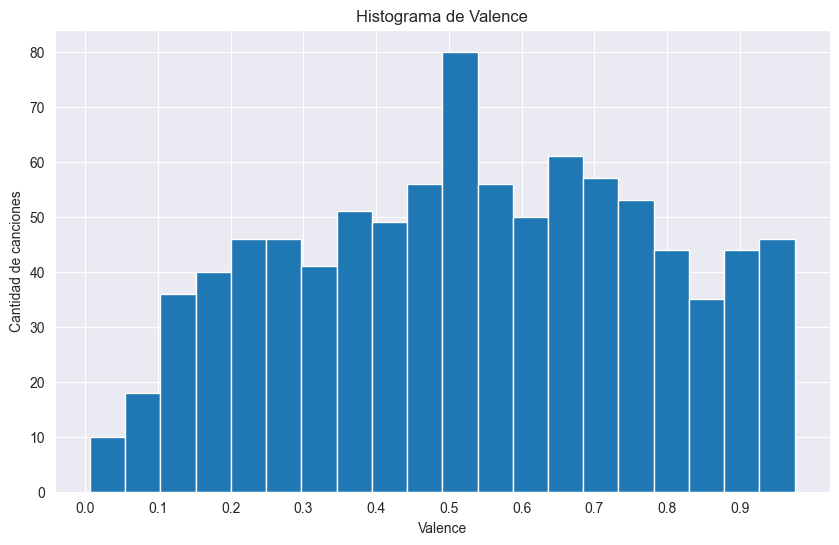

In [25]:
import numpy as np

# Ordenamos los datos
valence_sort = copy_covers_ds['Valence'].sort_values()

# Definimos el número de intervalos (bins)
bins = 20

# Graficamos el histograma
plt.figure(figsize=(10, 6))
plt.hist(valence_sort, bins=bins)

# Añadimos título y etiquetas
plt.title('Histograma de Valence')
plt.xlabel('Valence')
plt.ylabel('Cantidad de canciones')
plt.xticks(np.arange(0,1,0.1))

# Mostramos el gráfico
plt.show()

La curva se ve bastante balanceada, hay un pico justo en el centro de la distribucion lo que indica una gran cantidad de canciones con una valenic apromedio.

In [26]:
mas_valencia =  copy_covers_ds[covers_dataset['Valence'] > 0.95].sort_values('Valence')
mas_valencia

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year,DURATION(s)
461,Cantaloop (FLIP Fantasia),Us3,4:39,4,0.852,0.655,5,-11.498,0,0.0645,0.1070,0.000021,0.1370,0.952,115.962,49,1994,279
430,Wild Night,John Mellencamp featuring Me’shell Ndegeocello,3:33,4,0.568,0.714,7,-7.139,1,0.0445,0.1740,0.000000,0.0429,0.955,146.338,62,1994,213
484,Come And Get Your Love,Real McCoy,3:25,4,0.731,0.804,11,-7.621,0,0.0473,0.1720,0.000280,0.0685,0.957,107.383,82,1995,205
631,Key West Intermezzo (I Saw You First),John Mellencamp,4:54,4,0.673,0.858,11,-6.511,1,0.0270,0.0050,0.000019,0.2740,0.959,116.477,45,1996,294
860,(YOU Drive Me) Crazy,Britney Spears,3:18,4,0.748,0.939,0,-4.288,0,0.0341,0.0534,0.000000,0.3200,0.960,104.001,66,1999,198
111,Power Of Love/Love Power,Luther Vandross,3:54,4,0.768,0.828,5,-5.109,1,0.0313,0.0964,0.000029,0.0970,0.961,118.777,75,1991,234
401,The Power Of Love,Céline Dion,3:54,4,0.768,0.828,5,-5.109,1,0.0313,0.0964,0.000029,0.0970,0.961,118.777,75,1994,234
18,The Power,Snap!,3:54,4,0.768,0.828,5,-5.109,1,0.0313,0.0964,0.000029,0.0970,0.961,118.777,75,1990,234
221,Achy Breaky Heart,Billy Ray Cyrus,3:23,4,0.800,0.563,9,-10.209,1,0.0303,0.0510,0.000000,0.0797,0.961,121.808,68,1992,203
836,Smooth,Santana featuring Rob Thomas,4:18,4,0.734,0.580,9,-6.619,0,0.0321,0.2380,0.000600,0.0298,0.962,119.336,79,1999,258


In [27]:
menos_valencia =  copy_covers_ds[covers_dataset['Valence'] < 0.05].sort_values('Valence')
menos_valencia

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year,DURATION(s)
295,Rain,Madonna,2:11,5,0.231,0.97600,10,-27.426,0,0.0487,0.1520,0.987000,0.4800,0.00672,96.552,81,1993,131
53,Release Me,Wilson Phillips,2:49,1,0.152,0.00504,0,-34.183,1,0.0432,0.9530,0.928000,0.1020,0.03030,136.702,57,1990,169
762,Frozen,Madonna,2:41,4,0.179,0.00580,0,-37.260,1,0.0481,0.9240,0.929000,0.1060,0.03140,72.177,67,1998,161
294,If,Janet Jackson,2:52,4,0.457,0.49900,1,-6.670,1,0.0334,0.2470,0.000063,0.1710,0.03480,127.950,84,1993,172
143,This House,Tracie Spencer,3:40,4,0.527,0.14200,4,-17.440,1,0.0277,0.9550,0.764000,0.0917,0.03690,105.960,59,1991,220
323,Connected,Stereo MC’s,3:16,4,0.135,0.00134,2,-42.950,1,0.0496,0.9690,0.972000,0.0884,0.03720,141.488,66,1993,196
748,My Heart Will Go On,Celine Dion,4:40,1,0.428,0.27600,4,-11.729,1,0.0312,0.7320,0.000005,0.1170,0.03820,99.195,75,1998,280
411,So Much In Love,All-4-One,2:58,4,0.522,0.95300,2,-4.347,1,0.0833,0.0722,0.000633,0.2110,0.03960,131.937,69,1994,178
685,I Believe I Can Fly,R. Kelly,5:20,4,0.550,0.44400,7,-7.588,1,0.0292,0.2410,0.000000,0.1870,0.04380,120.179,59,1997,320
780,Victory,Puff Daddy featuring The Notorious B.I.G. and ...,3:58,4,0.597,0.75500,4,-2.209,0,0.0520,0.0423,0.000000,0.5820,0.04670,89.146,60,1998,238


### Analisis de ```Popularity```

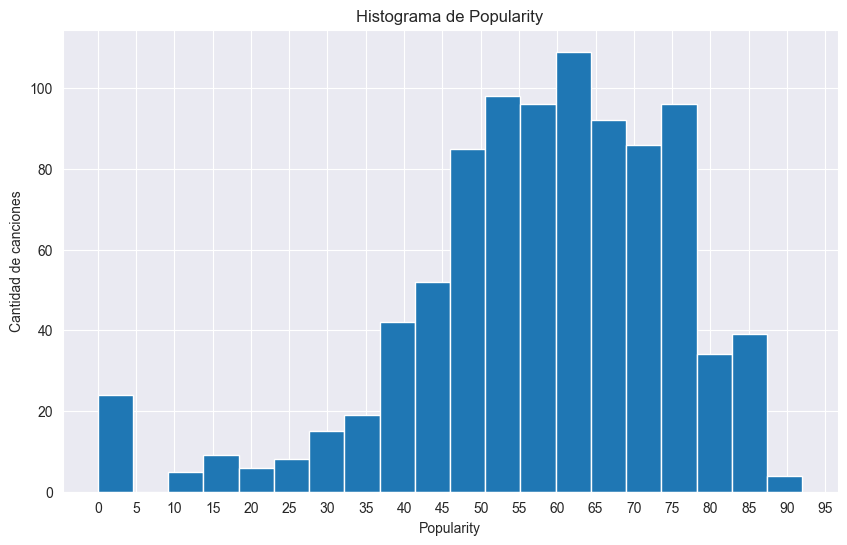

In [28]:
import numpy as np

# Ordenamos los datos
popularity_sort = copy_covers_ds['Popularity'].sort_values()

# Definimos el número de intervalos (bins)
bins = 20

# Graficamos el histograma
plt.figure(figsize=(10, 6))
plt.hist(popularity_sort, bins=bins)

# Añadimos título y etiquetas
plt.title('Histograma de Popularity')
plt.xlabel('Popularity')
plt.ylabel('Cantidad de canciones')
plt.xticks(np.arange(0,100,5))

# Mostramos el gráfico
plt.show()

Podemos ver una curva bastante sesgada hacia la izquierda. Analicemos las canciones con mas popularidad!

In [29]:
mas_populares =  copy_covers_ds[covers_dataset['Popularity'] > 85].sort_values('Popularity')
mas_populares

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year,DURATION(s)
99,Romantic,Karyn White,2:12,4,0.571,0.544,6,-10.613,1,0.0299,0.45300,0.008050,0.3220,0.216,132.052,86,1991,132
565,Nobody,Keith Sweat featuring Athena Cage,3:00,3,0.358,0.284,7,-8.285,1,0.0285,0.80500,0.000000,0.1830,0.276,99.796,86,1996,180
481,Creep,TLC,3:58,4,0.515,0.430,7,-9.935,1,0.0372,0.00970,0.000133,0.1290,0.104,91.844,86,1995,238
480,Believe,Elton John,3:24,4,0.776,0.780,10,-4.374,0,0.1280,0.06220,0.000000,0.0810,0.666,124.949,86,1995,204
645,Pony,Ginuwine,4:18,4,0.610,0.650,6,-6.199,1,0.0474,0.39900,0.000000,0.1100,0.507,106.719,86,1997,258
735,The Boy Is Mine,Brandy and Monica,2:53,4,0.795,0.630,7,-5.854,0,0.0434,0.15700,0.000000,0.0732,0.447,97.998,86,1998,173
644,Nobody,Keith Sweat,3:00,3,0.358,0.284,7,-8.285,1,0.0285,0.80500,0.000000,0.1830,0.276,99.796,86,1997,180
825,All Night Long,Faith Evans featuring Puff Daddy,3:30,4,0.532,0.767,7,-5.509,1,0.0574,0.00287,0.000513,0.3900,0.755,127.361,86,1999,210
826,All Star,Smash Mouth,3:52,4,0.695,0.633,8,-4.946,1,0.0599,0.06120,0.000195,0.0926,0.557,96.782,86,1999,232
827,Believe,Cher,3:24,4,0.776,0.780,10,-4.374,0,0.1280,0.06220,0.000000,0.0810,0.666,124.949,86,1999,204


Ahora las menos populares!

In [30]:
menos_populares =  copy_covers_ds[covers_dataset['Popularity'] < 15].sort_values('Popularity')
menos_populares

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year,DURATION(s)
198,I Can’t Wait Another Minute,Hi-Five,4:37,4,0.640,0.448,8,-15.519,1,0.0556,0.202000,0.000000,0.0680,0.6840,148.076,0,1991,277
98,I’ll Be Your Shelter,Taylor Dayne,4:39,4,0.467,0.392,8,-7.556,1,0.0280,0.105000,0.001430,0.1180,0.3240,129.850,0,1990,279
97,I’ll Be Your Everything,Tommy Page,3:13,4,0.516,0.663,6,-6.027,0,0.0365,0.000180,0.829000,0.1030,0.6220,193.990,0,1990,193
96,(CAN’T Live Without Your) Love And Affection,Nelson,4:03,4,0.852,0.907,4,-5.571,1,0.0439,0.259000,0.000188,0.0667,0.9640,120.043,0,1990,243
387,That’s The Way Love Goes,Janet Jackson,1:57,4,0.558,0.310,7,-14.463,1,0.0318,0.921000,0.001850,0.5910,0.4020,97.253,0,1993,117
386,I’ll Never Get Over You (GETTING Over Me),Exposé,3:48,4,0.405,0.394,8,-7.692,1,0.0289,0.139000,0.000000,0.2570,0.0984,171.999,0,1993,228
293,That’s What Love Is For,Amy Grant,3:25,4,0.529,0.758,9,-5.950,1,0.0372,0.116000,0.004950,0.1610,0.7980,97.865,0,1992,205
563,I’d Lie For You (AND That’s The Truth),Meat Loaf,4:26,4,0.483,0.544,2,-10.597,1,0.0343,0.610000,0.709000,0.1010,0.2980,171.923,0,1995,266
641,Old Man And Me (WHEN I Get To Heaven),Hootie & the Blowfish,4:29,4,0.466,0.612,4,-9.155,1,0.0355,0.527000,0.000000,0.0948,0.7810,98.014,0,1996,269
642,Tonite’s Tha Night,Kris Kross,3:20,4,0.570,0.634,8,-17.278,1,0.0314,0.015700,0.931000,0.2570,0.5650,140.022,0,1996,200


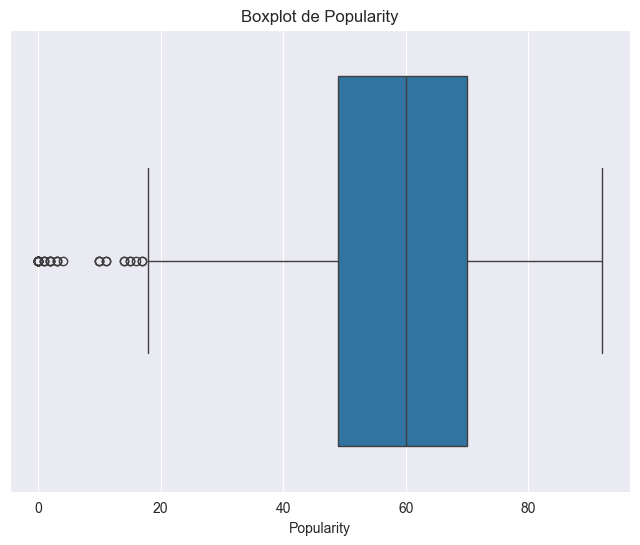

In [31]:
# Nos quedamos solo con la columna Danceability
popularity = covers_dataset["Popularity"]

# Creamos el boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=popularity)
plt.title("Boxplot de Popularity")
plt.xlabel("Popularity")
plt.show()

Podrian eliminarse las canciones con pupularidad cerna a 0, tampco exageremos y borremos todas, pero cancion con una popularidad de 0 no nos inspira muchha confianza.

El box plot confirma una tendencia a valores mas altos de popularidad y tambien detecta algunos outliers. En el histograma se veia una concentracion de canciones con popularidad entre 0 y 5. No son canciones conocidas las que se concentran ahi pero nos resulta un poco raro. La variable en si es rara, no sabemos en base a que fue medida la popularidad de la cancion. Los valores pueden estar condicionados debido a que el dataset esta acotado a covers de los 90s, si los datos fueron recuperados cercanamente a la decada de los noventa por ejemplo los 2000s las personas escucharian estos covers mas que si nos alejaramos de los 90s y a medida que saldrian nuevas canciones y covers los valores se verian disminuidos  .Quizas recolectaron datos de otra aplicacion o de alguna plataforma de musica. Tampcoo sabemos que usaron de parametro para medirla, si las escuchas mensuales, discos vendidos, me gustas etc.

### Analisis de ```Danceability```

Con el método ```value_counts()``` no se vió nada extraño. Por lo tanto, vamos a hacer un boxplot para ver mas en detalle la distribución de la variable.

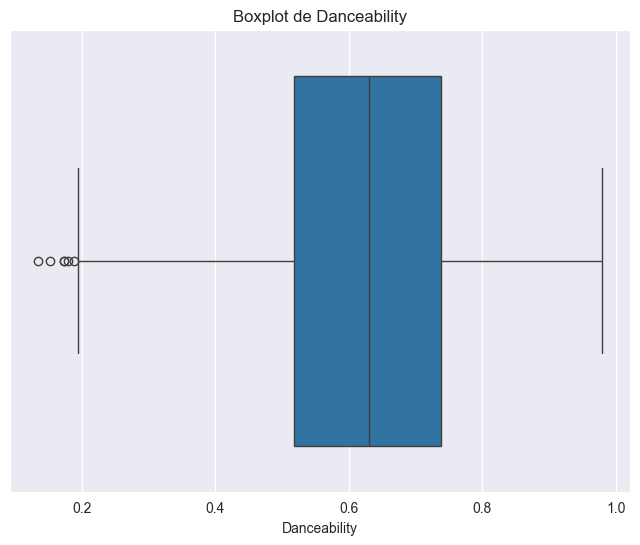

In [32]:
# Nos quedamos solo con la columna Danceability
danceability = covers_dataset["Danceability"]

# Creamos el boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=danceability)
plt.title("Boxplot de Danceability")
plt.xlabel("Danceability")
plt.show()

In [33]:
min = copy_covers_ds["Danceability"].min()
copy_covers_ds[copy_covers_ds["Danceability"] == min]

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year,DURATION(s)
323,Connected,Stereo MC’s,3:16,4,0.135,0.00134,2,-42.95,1,0.0496,0.969,0.972,0.0884,0.0372,141.488,66,1993,196


Parece que hay unos valores del lado izquierdo, podrian ser posibles outliers. 

Podemos observar esta distribución de una forma más clara mediante un histograma

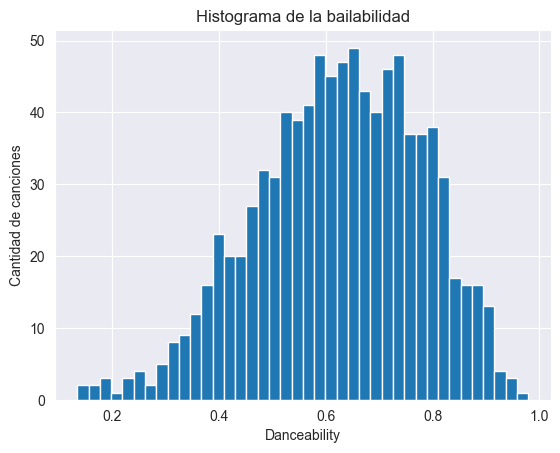

In [34]:
bins = 40

plt.hist(copy_covers_ds['Danceability'], bins = bins)

plt.xlabel('Danceability')
plt.ylabel('Cantidad de canciones')
plt.title('Histograma de la bailabilidad')
plt.show()

In [35]:
#Vamos a mirar quiénes son las canciones que son poco bailables
poco_bailables = copy_covers_ds[copy_covers_ds["Danceability"] < 0.2]
poco_bailables

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year,DURATION(s)
53,Release Me,Wilson Phillips,2:49,1,0.152,0.00504,0,-34.183,1,0.0432,0.95300,0.928000,0.1020,0.0303,136.702,57,1990,169
323,Connected,Stereo MC’s,3:16,4,0.135,0.00134,2,-42.950,1,0.0496,0.96900,0.972000,0.0884,0.0372,141.488,66,1993,196
336,Dre Day,Dr. Dre featuring Snoop Doggy Dogg,1:55,4,0.188,0.84700,8,-3.268,1,0.0340,0.07680,0.320000,0.1210,0.3890,88.494,61,1993,115
394,Always,Bon Jovi,3:43,4,0.174,0.74200,8,-5.930,1,0.0485,0.00181,0.281000,0.1980,0.3600,163.378,78,1994,223
395,Always,Erasure,3:43,4,0.174,0.74200,8,-5.930,1,0.0485,0.00181,0.281000,0.1980,0.3600,163.378,78,1994,223
544,Ask Of You,Raphael Saadiq,4:54,3,0.194,0.11900,1,-20.926,1,0.0398,0.85400,0.000737,0.1090,0.1400,85.698,52,1995,294
762,Frozen,Madonna,2:41,4,0.179,0.00580,0,-37.260,1,0.0481,0.92400,0.929000,0.1060,0.0314,72.177,67,1998,161


Podemos ver que, por ejemplo, "Frozen" de Madonna es una canción poco bailable. En particular, 3 de las 7 canciones menos bailables son también poco enérgicas, por lo que valdría la pena en un futuro análisis corroborar si existe una correlación fuerte entre ```Danceability``` y ```Energy```

### Analisis de ```Duration```

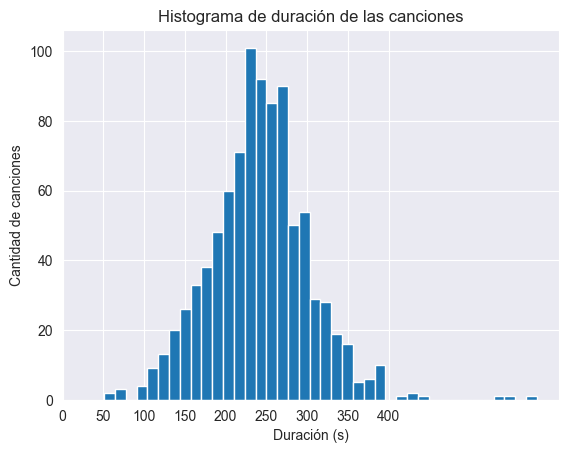

In [36]:
bins = 40

plt.hist(copy_covers_ds['DURATION(s)'], bins = bins)

plt.xlabel('Duración (s)')
plt.ylabel('Cantidad de canciones')
plt.title('Histograma de duración de las canciones')
plt.xticks(range(0, 450, 50))
plt.show()

Se puede ver que la mayoría de las canciones duran entre 150 y 300 segundos(2:30 y 5:00 minutos). Hay algunos outliers que superan los 500 segundos(8:33 minutos) y hay que corroborrar que sean correctos

In [37]:
max = copy_covers_ds["DURATION(s)"].max()
copy_covers_ds[copy_covers_ds["DURATION(s)"] == max]

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year,DURATION(s)
699,Feels So Good,Mase,9:42,4,0.576,0.603,5,-9.603,1,0.0329,0.455,0.0537,0.0406,0.524,103.658,51,1997,582


Corroboramos en internet que la canción dura 3:29 minutos, paro no meter mano en los datos podemos simplemente borrar estos tres outliers para que no molesten.

In [38]:
copy_covers_ds[copy_covers_ds['DURATION(s)'] > 500]

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year,DURATION(s)
204,November Rain,Guns N’ Roses,8:56,4,0.294,0.640,11,-9.316,1,0.0291,0.016,0.22000,0.1120,0.226,79.790,78,1992,536
485,Runaway,Janet Jackson,9:07,4,0.374,0.568,1,-3.825,0,0.1090,0.219,0.00219,0.5130,0.111,84.733,80,1995,547
699,Feels So Good,Mase,9:42,4,0.576,0.603,5,-9.603,1,0.0329,0.455,0.05370,0.0406,0.524,103.658,51,1997,582


La segunda canción más larga es "November Rain" de Guns 'n Roses y su duración concuerda con el dataset

Podemos tomar como medida eliminar estos tres outliers que nos estan afectando la distribucion en la curva.

In [39]:
copy_covers_ds = copy_covers_ds[copy_covers_ds['DURATION(s)'] < 500]

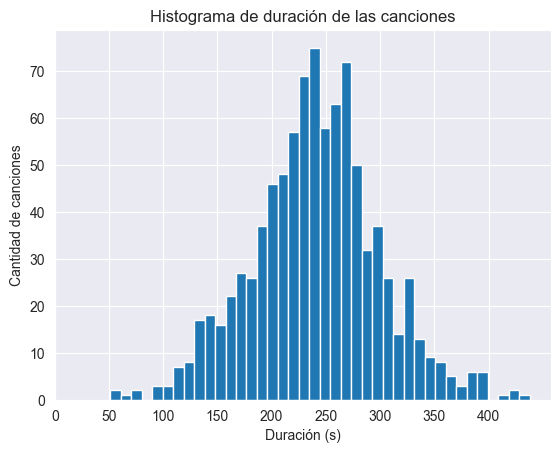

In [40]:
bins = 40

plt.hist(copy_covers_ds['DURATION(s)'], bins = bins)

plt.xlabel('Duración (s)')
plt.ylabel('Cantidad de canciones')
plt.title('Histograma de duración de las canciones')
plt.xticks(range(0, 450, 50))
plt.show()

Ahora si ;)

### Analisis de ```Loudness```

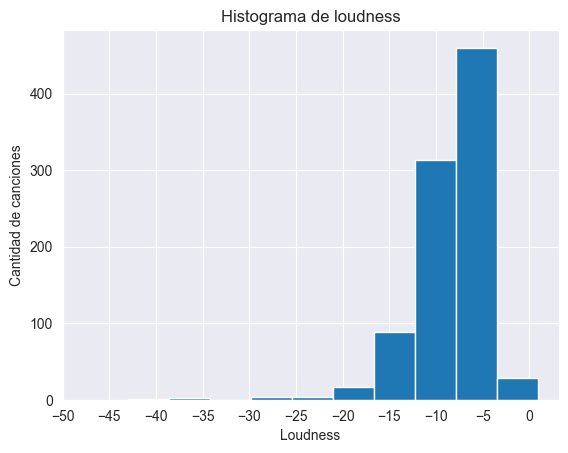

In [41]:
bins = 10

plt.hist(copy_covers_ds['Loudness'], bins = bins)

plt.xlabel('Loudness')
plt.ylabel('Cantidad de canciones')
plt.title('Histograma de loudness')
plt.xticks(range(-50, 5, 5))
plt.show()

Podemos ver que hay algunos valores que son minoria abajo de -20db, veamos quienes son.

In [42]:
copy_covers_ds[copy_covers_ds['Loudness'] < -20]


,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year,DURATION(s)
53,Release Me,Wilson Phillips,2:49,1,0.152,0.00504,0,-34.183,1,0.0432,0.953,0.928000,0.1020,0.03030,136.702,57,1990,169
92,This One’s For The Children,New Kids on the Block,3:09,4,0.815,0.10500,0,-20.005,1,0.2570,0.990,0.934000,0.1130,0.54300,96.860,11,1990,189
226,When A Man Loves A Woman,Michael Bolton,2:53,3,0.516,0.15000,1,-20.410,1,0.0272,0.130,0.075500,0.1220,0.20500,97.398,66,1992,173
235,Beauty And The Beast,Celine Dion and Peabo Bryson,2:47,4,0.432,0.08770,8,-27.006,1,0.0680,0.995,0.922000,0.1170,0.14900,79.203,60,1992,167
266,Thinkin’ Back,Color Me Badd,2:04,4,0.648,0.04060,9,-22.391,1,0.0459,0.983,0.931000,0.1030,0.67200,77.071,49,1992,124
295,Rain,Madonna,2:11,5,0.231,0.97600,10,-27.426,0,0.0487,0.152,0.987000,0.4800,0.00672,96.552,81,1993,131
323,Connected,Stereo MC’s,3:16,4,0.135,0.00134,2,-42.950,1,0.0496,0.969,0.972000,0.0884,0.03720,141.488,66,1993,196
544,Ask Of You,Raphael Saadiq,4:54,3,0.194,0.11900,1,-20.926,1,0.0398,0.854,0.000737,0.1090,0.14000,85.698,52,1995,294
557,No More I Love You’s,Annie Lennox,3:07,4,0.364,0.02920,3,-21.088,1,0.0594,0.991,0.963000,0.0912,0.14600,166.335,40,1995,187
762,Frozen,Madonna,2:41,4,0.179,0.00580,0,-37.260,1,0.0481,0.924,0.929000,0.1060,0.03140,72.177,67,1998,161


Son en total 12 canciones, de las cuales hay un valor min. Cercano a -40.

In [43]:
loudness = copy_covers_ds['Loudness']
loudness.describe()

count    916.000000
mean      -8.351585
std        3.895975
min      -42.950000
25%      -10.172000
50%       -7.596500
75%       -5.753500
max        0.919000
Name: Loudness, dtype: float64

Vemos que hay un valor minimo de -42. La verdad que no sabemos bien en base a que fue medida esta variable ni que usaron de referencia.
 Si sacamos concluciones podriamos decir que es una medida en base al umbral de audicion humano o es en base a que en 0db la cancion se deberia escuchar bien, en valores negativos bajo y en valores positivos alto.La primera opcion puede ser descartada ya que si seria en base a nuetra audicion un valor de -42db significaria que directamente no escuchamos la cancion cosa que no nos parece consistente.Consideremos entonces que es en base a una escala en la que 0 db es lo recomendado para que la cancion se escuche bien.Saquemos los valores dudosos!

In [44]:
copy_covers_ds = covers_dataset[covers_dataset['Loudness'] > -20]

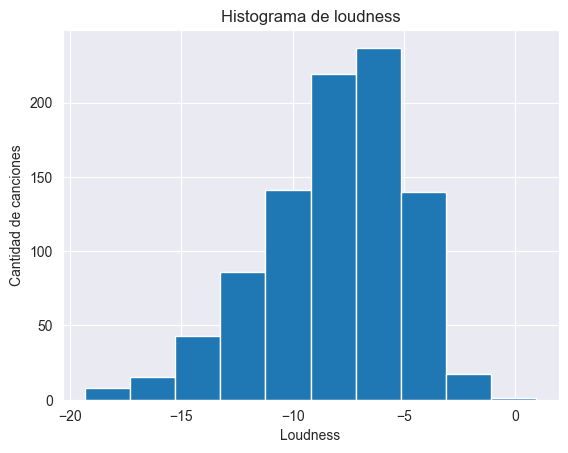

In [45]:
bins = 10

plt.hist(copy_covers_ds['Loudness'], bins = bins)

plt.xlabel('Loudness')
plt.ylabel('Cantidad de canciones')
plt.title('Histograma de loudness')
plt.xticks(range(-20, 5, 5))
plt.show()

La gran mayoria de los valores se encuentran entre -10 y -5, y se puede apreciar un ligero sesgo hacia la izquierda. Igualmente nos resultan raro tantos valores de decibeles negativos. 

### Analisis de ```Instrumentalness```

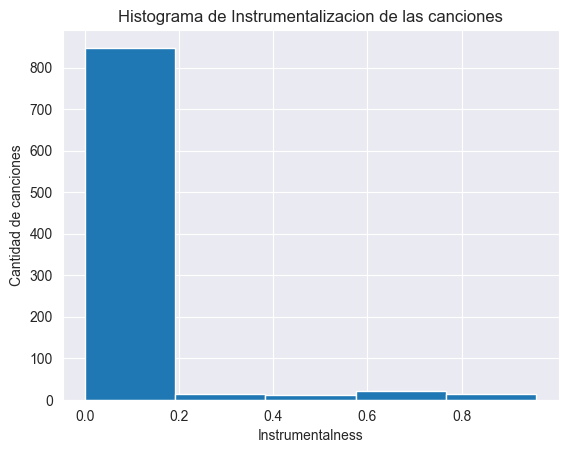

In [46]:
bins = 5

plt.hist(copy_covers_ds['Instrumentalness'], bins = bins)

plt.xlabel('Instrumentalness')
plt.ylabel('Cantidad de canciones')
plt.title('Histograma de Instrumentalizacion de las canciones')
plt.xticks(np.arange(0, 1, 0.2))
plt.show()

Podriamos discretizar la variable, por ejemplo utilizar una escala "nula, baja, media, alta"

In [47]:
#Creamos la nueva columna con las variable discretizada(todavia no hay nada) y la inicializamos en nulo.
copy_covers_ds['Instrumentalness Type'] = pd.NA
#Por cada registro hacemos:
for index,row in copy_covers_ds.iterrows():
    #Consideramos los 4 casos(intervalos) y asignamos el nueva valor segun corresponda
    instrulmentalness_original = row['Instrumentalness']
    if(instrulmentalness_original == 0):
        instrulmentalness_nueva = 'nula'
    elif(instrulmentalness_original > 0 and instrulmentalness_original <= 0.5 ) :
        instrulmentalness_nueva = 'baja'
    elif(instrulmentalness_original > 0.5 and instrulmentalness_original <= 1) :
        instrulmentalness_nueva = 'alta'
   
        
    copy_covers_ds.at[index,'Instrumentalness Type'] = instrulmentalness_nueva

copy_covers_ds.head()

C:\Users\axelt\AppData\Local\Temp\ipykernel_12016\1672323178.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_covers_ds['Instrumentalness Type'] = pd.NA


,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year,Instrumentalness Type
0,Everybody Everybody,Black Box,4:11,4,0.645,0.795,7,-12.095,1,0.0527,0.3470,0.003890,0.1040,0.535,112.067,87,1990,baja
1,Close To You,Maxi Priest,3:45,4,0.590,0.727,6,-7.955,1,0.0706,0.0259,0.000065,0.0827,0.356,121.966,85,1990,baja
2,Do Me!,Bell Biv DeVoe,3:56,4,0.615,0.534,9,-6.719,0,0.0386,0.1060,0.000018,0.0607,0.193,135.917,84,1990,baja
3,Everything,Jody Watley,4:05,4,0.704,0.225,6,-14.454,0,0.0994,0.9020,0.657000,0.1060,0.243,120.006,82,1990,alta
4,What It Takes,Aerosmith,3:21,4,0.672,0.655,10,-5.021,0,0.0310,0.0362,0.000000,0.1170,0.555,134.948,82,1990,nula


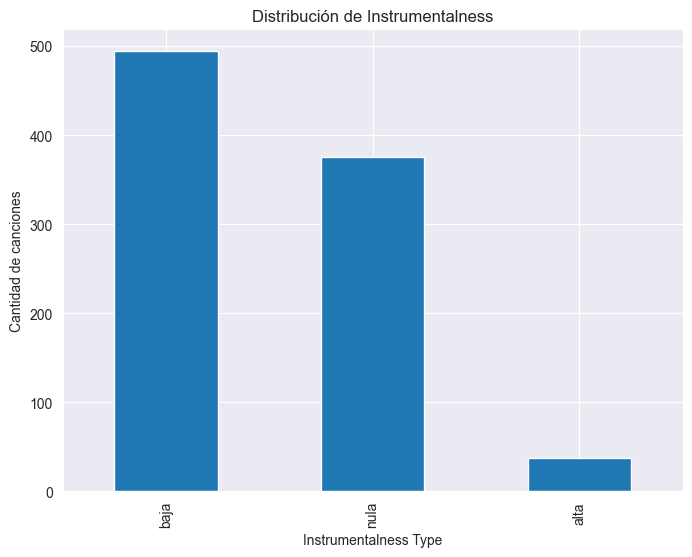

In [48]:
# Contar la cantidad de cada tipo de 'Instrumentalness Type'
instrumentalness_counts = copy_covers_ds['Instrumentalness Type'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
instrumentalness_counts.plot(kind='bar')
plt.title('Distribución de Instrumentalness')
plt.xlabel('Instrumentalness Type')
plt.ylabel('Cantidad de canciones')
plt.show()

Podemos ver que hay muchas canciones con instrumentalizacion baja(cuidado que el intervalo para bajo es un poco mayor(0.1). Y que tambien hay muchas canciones con una instrumentalizacion nula(0 de instrumentalizacion)

### Analisis de ```Time Signature```

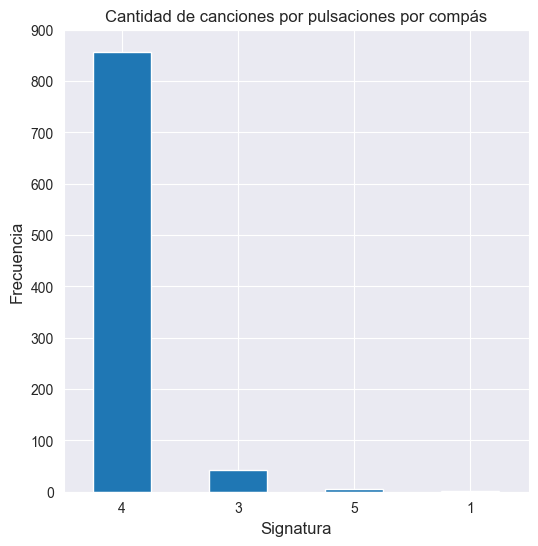

In [49]:
# Contar la cantidad de cada tipo de 'Instrumentalness Type'
Time_signature_counts = copy_covers_ds['Time_Signature'].value_counts()

plt.figure(figsize=(6,6))
Time_signature_counts.plot(kind = 'bar')
plt.yticks(range(0,901,100))
plt.xticks(rotation = 0)
plt.title('Cantidad de canciones por pulsaciones por compás')
plt.xlabel('Signatura', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.show()

Observamos que la gran mayoría de las canciones tienen 4 pulsaciones por compas, es un compás muy común según investigamos.

### Analisis de ```Liveness```

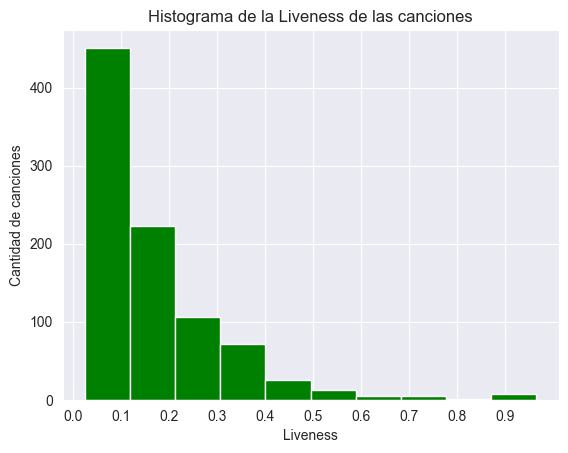

In [50]:
bins = 10

plt.hist(copy_covers_ds['Liveness'], bins = bins,color='green')

plt.xlabel('Liveness')
plt.ylabel('Cantidad de canciones')
plt.title('Histograma de la Liveness de las canciones')
plt.xticks(np.arange(0, 1, 0.1))
plt.show()

Vemos una distribucion muy sesgada hacia la derecha, lo que quiere decir que probablemente haya muchas canciones con poca presencia de la audiencia. Hay un par de valor que podrian ser posibles outliers ariba de 0.9 pero realmente no nos parece significante.

### Analisis de ```Energy```


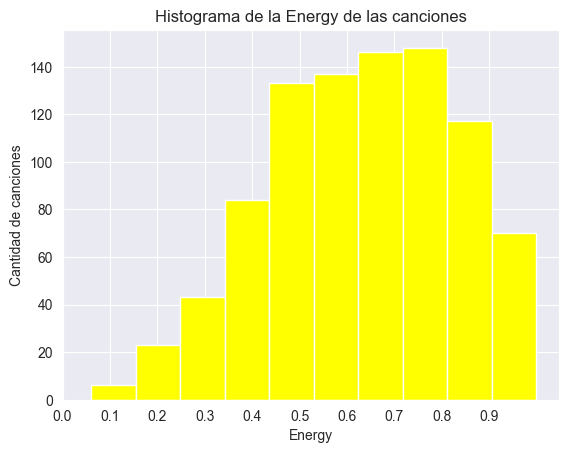

In [51]:
bins = 10

plt.hist(copy_covers_ds['Energy'], bins = bins,color='yellow')

plt.xlabel('Energy')
plt.ylabel('Cantidad de canciones')
plt.title('Histograma de la Energy de las canciones')
plt.xticks(np.arange(0, 1, 0.1))
plt.show()

Podemos observar una cuerva bastante sesgada hacia la derecha, lo que indica una gran presencia de canciones energéticas. Sinceramente como con muchas otras variables no sabemos como es que fueron medidas, como pasa en el caso de esta variable. ¿Como midieron la energia de la cancion? ¿estara ligada al ritmo?

Algunas canciones con un valor de energía bajo son:

In [52]:
copy_covers_ds[copy_covers_ds['Energy'] < 0.1]

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year,Instrumentalness Type
270,Take This Heart,Richard Marx,3:45,3,0.52,0.0604,5,-11.32,1,0.0512,0.986,0.00136,0.107,0.128,118.562,48,1992,baja


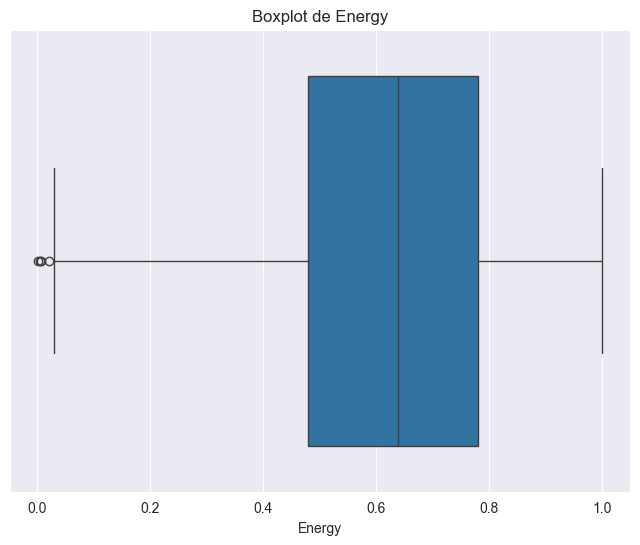

In [53]:
# Nos quedamos solo con la columna Energy
energy = covers_dataset["Energy"]

# Creamos el boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=energy)
plt.title("Boxplot de Energy")
plt.xlabel("Energy")
plt.show()

### Analisis de ```Key```

Esta variable es cuantitativa discreta, con valores de 0 a 11 y representan la clave de la canción, cada valor es una nota: Do Do# Re Re# Mi Fa Fa# Sol Sol# La La# Si 

La clave de una canción sería como la nota en la que se centra esa canción, el resto de las notas están alrededor de la misma. La clave es la nota en la que va a empezar la escala. Es como una nota de reposo, a la que volves al final porque si no se sentiría como que suena incompleto.

Adjuntos dos videos que ayudan a entenderlo mejor: 
- [What does 'in the key of' mean? // Beginner music theory for piano](https://www.youtube.com/watch?v=h2k-NDPTL4o)
- [Qué son las TONALIDADES. Tonalidad mayor y menor. | Jaime Altozano](https://www.youtube.com/watch?v=o6aOC3rERF0)

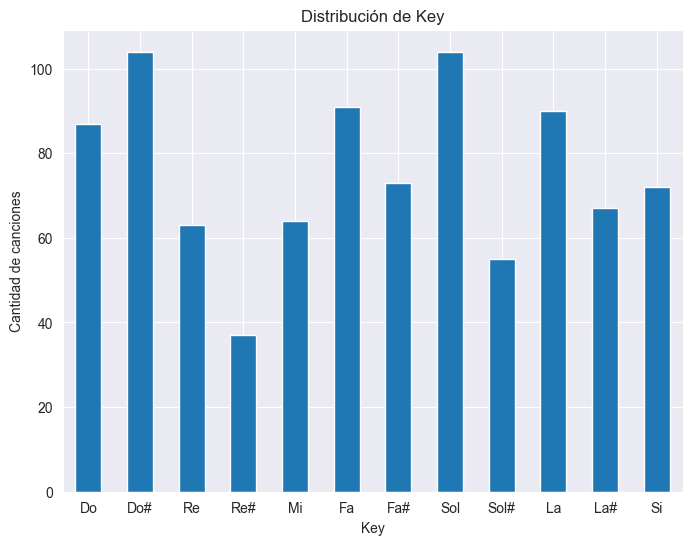

In [54]:
import matplotlib.pyplot as plt

# Contamos la cantidad de cada tipo de 'Key'
key_counts = copy_covers_ds['Key'].value_counts().sort_index()

# Creamos el gráfico de barras
plt.figure(figsize=(8, 6))
key_counts.plot(kind='bar')

# Establecemos las etiquetas del eje x para las tonalidades(Time_Signature)
plt.xticks(ticks=range(len(key_counts)), labels=['Do', 'Do#', 'Re', 'Re#', 'Mi', 'Fa', 'Fa#', 'Sol', 'Sol#', 'La', 'La#', 'Si'],rotation=0)

plt.title('Distribución de Key')
plt.xlabel('Key')
plt.ylabel('Cantidad de canciones')
plt.show()


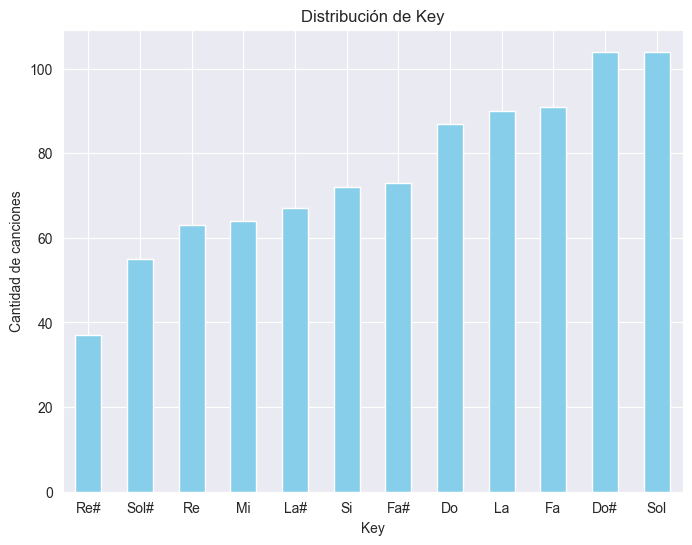

In [55]:
# Contar la cantidad de cada tipo de 'Key' y ordenar por cantidad
key_counts = copy_covers_ds['Key'].value_counts().sort_values()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
key_counts.plot(kind='bar', color='skyblue')

# Mapeo de índices a nombres de notas musicales
notas = ['Do', 'Do#', 'Re', 'Re#', 'Mi', 'Fa', 'Fa#', 'Sol', 'Sol#', 'La', 'La#', 'Si']
labels = [notas[i] for i in key_counts.index]  # Obtener las etiquetas correspondientes al índice ordenado

# Configurar las etiquetas y el gráfico
plt.xticks(ticks=range(len(key_counts)), labels=labels, rotation=0)
plt.title('Distribución de Key')
plt.xlabel('Key')
plt.ylabel('Cantidad de canciones')
plt.show()

Al realizar el histograma podemos ver que las Key que tienen más canciones son la clave de [Do#](https://youtu.be/TpYeSEIONG8?t=22) y [Sol](https://youtu.be/tFTM7e4VjJw?t=30), y la que tiene menos canciones es la clave de [Re#](https://youtu.be/v3bBZcUQKJ0?t=29).

Sin embargo, luego de esta investigación nos dimos cuenta qué no podemos analizar la clave sin el tono. Las claves pueden estar en tono mayor o menor, y eso lo hace sonar más alegre o más triste respectivamente.

Analisis de Key con Mode que nadie pidio: 

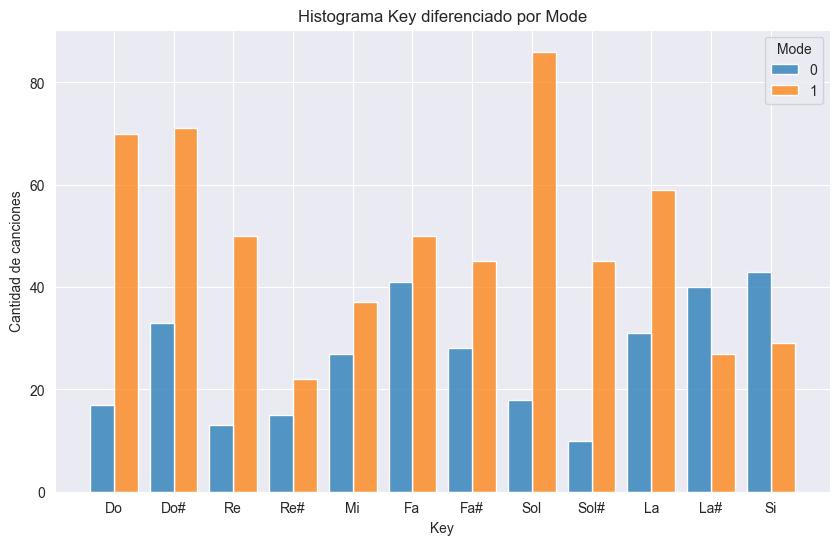

In [56]:
key_mode = copy_covers_ds[['Key', 'Mode']]
#key_mode['Key+Mode'] = 

key_counts = copy_covers_ds['Key'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
#key_counts.plot(kind='bar', color='skyblue')

notas = ['Do', 'Do#', 'Re', 'Re#', 'Mi', 'Fa', 'Fa#', 'Sol', 'Sol#', 'La', 'La#', 'Si']
labels = [notas[i] for i in key_counts.index]

sns.histplot(data=key_mode, x='Key', hue='Mode', multiple='dodge', discrete=True, shrink=0.8)
plt.title('Histograma Key diferenciado por Mode')
plt.xlabel('Key')
plt.ylabel('Cantidad de canciones')
plt.xticks(ticks=range(len(key_counts)), labels=labels, rotation=0)
plt.show()

Ahora si podemos ver Key diferenciada por modo. Como aca se ve y más adelante se vuelve a mencionar, hay muchas más canciones en tono mayor que menor.

De las canciones en tono mayor, de las que más hay es en clave Sol, Do# y Do.

De las canciones en tono menor, de las que más hay es en clave Si, Fa y La#.

### Analisis de ```Speechiness```

Es la medida de presencia de palabras habladas en las canciones, valores altos indican una alta presencia de estas palabras.

In [57]:
copy_covers_ds['Speechiness'].describe()

count    907.000000
mean       0.075937
std        0.079800
min        0.023000
25%        0.032200
50%        0.042800
75%        0.076250
max        0.529000
Name: Speechiness, dtype: float64

Es una variable cuantitativa continua

De la funcion describe() se puede ver que hasta el 75% de los datos son valores muy bajos debajo de 0.1

Esto podria significar que la mayoria de las canciones no tienen casi palabras habladas. Con palabras habladas pensamos que una cancion con valores altos seria una cancion de rap por ejemplo. 

Aunque tampoco hay ninguna que sea totalmente hablada, ya que el maximo llega a 0.529.

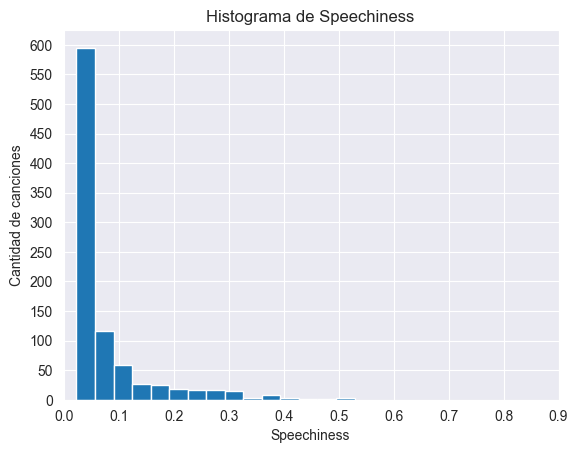

In [58]:
bins = 15

plt.hist(copy_covers_ds['Speechiness'], bins = bins)

plt.xlabel('Speechiness')
plt.ylabel('Cantidad de canciones')
plt.title('Histograma de Speechiness')
plt.xticks(np.arange(0, 1, 0.1))
plt.yticks(range(0,601,50))
plt.show()

Luego de realizar el histograma volvemos a confirmar que hay muchisimas canciones con valores bajos.

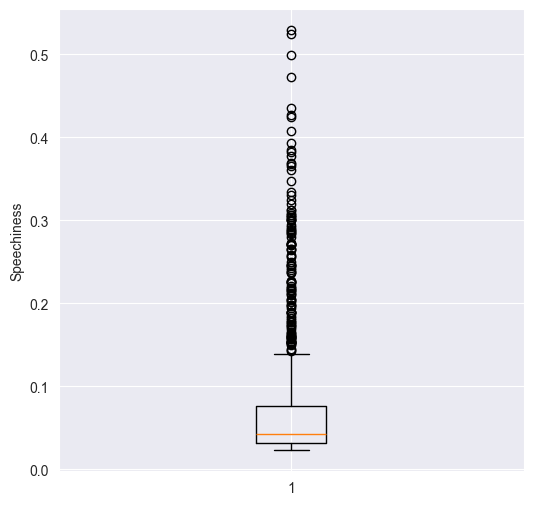

In [59]:
plt.figure(figsize=(6, 6))
plt.boxplot(copy_covers_ds['Speechiness'])
plt.ylabel('Speechiness')
plt.show()

Realizamos el boxplot para ver si quizas habia un valor solo alejado, pero en verdad esta distribuido medio parejo los valores mas alla del 75%. 

In [60]:
max = copy_covers_ds["Speechiness"].max()
copy_covers_ds[copy_covers_ds["Speechiness"] == max]

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year,Instrumentalness Type
873,Steal My Sunshine,Len,4:25,4,0.412,0.829,4,-11.112,1,0.529,0.394,0.0,0.108,0.677,191.476,63,1999,nula


In [61]:
min = copy_covers_ds["Speechiness"].min()
copy_covers_ds[copy_covers_ds["Speechiness"] == min]

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year,Instrumentalness Type
695,Building A Mystery,Sarah McLachlan,4:07,4,0.505,0.518,2,-8.601,1,0.023,0.403,0.0,0.129,0.472,81.019,52,1997,nula


Para chusmear un poco más, la cancion con el maximo de Speechiness es algo como Hip Hop, Pop Rap según lo que buscamos. Tiene sentido quiza que este ahi pero tampoco es que sea re hablada, es un valor de 0.529.

Y la cancion con el minimo de Speechiness tiene una onda triste, lenta y bien cantada. Pd: descubrimos que la artista es la que canta "When She Loved Me" de Toy Story 2 c':

### Análisis de ```Mode```

Como tenemos una variable categórica, podemos modelarla mediante un gráfico de barras, donde podamos apreciar la cantidad de canciones de cada categoría

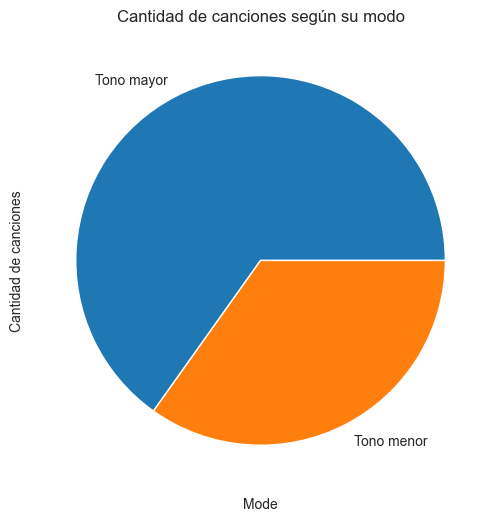

In [62]:
#Contamos la cantidad de canciones de cada tipo
mode_values = copy_covers_ds['Mode'].value_counts()

plt.figure(figsize=(8, 6))
mode_values.plot(kind='pie', labels=['Tono mayor', 'Tono menor'])
plt.title('Cantidad de canciones según su modo')
plt.xticks(rotation=0)
plt.xlabel('Mode')
plt.ylabel('Cantidad de canciones')
plt.show()


Se aprecia que hay muchas más canciones escritas en escala mayor que en escala menor. Según esta [página](https://www.artsmusica.net/teoria-musical/diferencia-entre-escalas-mayores-y-menores/), una canción compuesta por una escala mayor da una sensación de alegría, mientras que a las que se conforman por escalas menores se les atribuye sentimientos más tristes o depresivos. Por lo tanto, sería de especial interés comprobar si existe una relación entre ```Mode``` con la variable que mide los niveles de positividad de la canción, ```Valance```.

### Análisis de ```Acoustiness```

Ahora vamos a realizar el análisis sobre la variable que mide que tan acústica es una canción. Como se trata de una variable cuantitativa continua, vamos a discretizarla de manera tal de poder modelar su distribución en un histograma y/o boxplot 

In [63]:
copy_covers_ds['Acousticness'].value_counts()

Acousticness
0.21500    5
0.11800    5
0.13900    4
0.43400    4
0.20000    4
          ..
0.40000    1
0.00913    1
0.77600    1
0.08860    1
0.04050    1
Name: count, Length: 667, dtype: int64

In [64]:
copy_covers_ds['Acousticness'].describe()

count    907.000000
mean       0.222169
std        0.245969
min        0.000004
25%        0.028950
50%        0.118000
75%        0.333500
max        0.986000
Name: Acousticness, dtype: float64

* Como se puede ver, el 75% de los datos se encuentran en el rango de 0.00 a 0.34 aprox mientras que el otro 25% se encuentra entre 0.34 y 0.99, por lo tanto, si se la grafica se podría apreciar un sesgo a derecha debido a ese porcentaje de datos restante
* Aunque la mayoría de los datos son pequeños, hay cierta dispersión y unos cuantos valores más altos que contribuyen a que la desviación estándar un poco más alta en comparación con la media

Ahora que conocemos la distribución de los datos, podemos optar por realizar una discretización de la variable de dos formas: equal-depth o entropy-based(equal-width no debido a que no maneja bien distribuciones sesgadas)<br>
Como tenemos 919 datos, podemos hacer 20 intervalos con, aproximadamente, 46 valores en cada uno

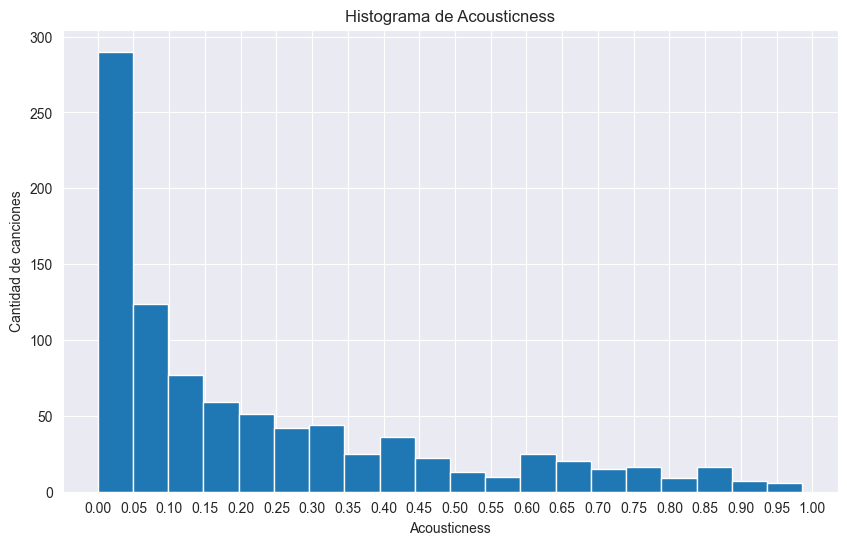

In [65]:
# Ordenamos los datos
acousticness_sort = copy_covers_ds['Acousticness'].sort_values()

# Definimos el número de intervalos (bins)
bins = 20

# Graficamos el histograma
plt.figure(figsize=(10, 6))
plt.hist(acousticness_sort, bins=bins)

# Añadimos título y etiquetas
plt.title('Histograma de Acousticness')
plt.xlabel('Acousticness')
plt.ylabel('Cantidad de canciones')
plt.xticks(np.arange(0,1.05,0.05))

# Mostramos el gráfico
plt.show()
##

El gráfico confirma lo que ya pensabamos, existe un fuerte sesgo a derecha. La mayoría de las canciones tienen un nivel acústico muy leve. Es decir, pocas canciones usan instrumentos acústicos(ej: violin, corno francés, trombón, saxofón, guitarra acústica, etc.

### Análisis de ```Year```

El año de lanzamiento es una variable de tipo cuantitativa discreta. Debido a que es un dataset de los años '90, tenemos canciones del 90 al 99.

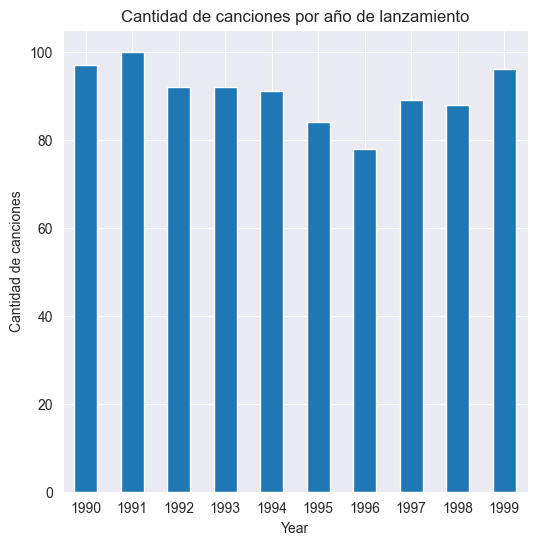

In [66]:
Year_counts = copy_covers_ds['Year'].value_counts().sort_index()

plt.figure(figsize=(6, 6))
Year_counts.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Cantidad de canciones')
plt.title('Cantidad de canciones por año de lanzamiento')
plt.xticks(rotation=0)
plt.show()

Podemos ver que se lanzaron más canciones en el año 1991, y menos en el 1996. En un futuro podríamos ver como se relaciona esto con la popularidad de las canciones.

### Análisis de ```Tempo```

La velocidad de la pista es una variable cuantitativa continua, por lo que podemos modelarla mediante un histograma

In [67]:
copy_covers_ds['Tempo'].value_counts()

Tempo
100.002    3
118.777    3
103.773    2
150.944    2
168.007    2
          ..
98.572     1
113.722    1
127.969    1
71.582     1
118.990    1
Name: count, Length: 861, dtype: int64

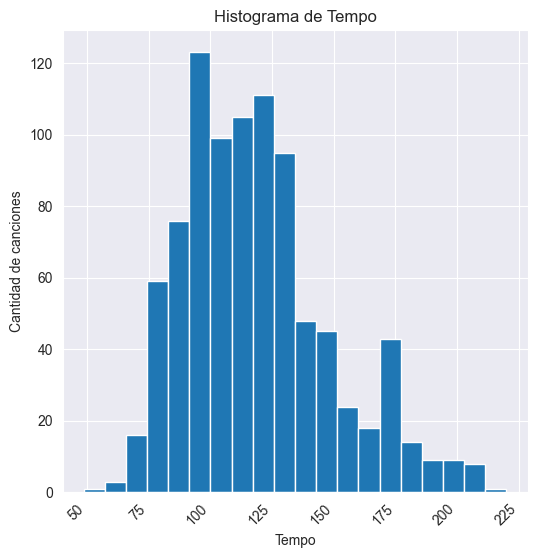

In [68]:
# Ordenamos los datos
tempo_sort = copy_covers_ds['Tempo'].sort_values()

# Definimos el número de intervalos (bins)
bins = 20

# Graficamos el histograma
plt.figure(figsize=(6, 6))
plt.hist(tempo_sort, bins=bins)

# Añadimos título y etiquetas
plt.title('Histograma de Tempo')
plt.xlabel('Tempo')
plt.ylabel('Cantidad de canciones')
#plt.xticks(range(45,230,10))
plt.xticks(rotation=45, ha='right')
# Mostramos el gráfico
plt.show()
##

En el histograma y, según información que encontramos en [esta fuente](https://hacercanciones.com/tutorial/el-tempo-y-la-musica/), la mayoría de las canciones tienen un ritmo medio tendiendo a rápido.<br>
La canción más rápida es:

In [69]:
max = copy_covers_ds["Tempo"].max()
copy_covers_ds[copy_covers_ds["Tempo"] == max]

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year,Instrumentalness Type
564,I’ll Be There For You/You’re All I Need To Get,by Method Man featuring Mary J. Blige,1:40,4,0.629,0.646,2,-7.775,0,0.112,0.000088,0.88,0.099,0.17,219.973,0,1995,alta


Y la más lenta:

In [70]:
min = copy_covers_ds["Tempo"].min()
copy_covers_ds[copy_covers_ds["Tempo"] == min]

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year,Instrumentalness Type
203,Tennessee,Arrested Development,4:53,4,0.392,0.37,9,-10.888,1,0.0298,0.205,0.0096,0.0821,0.512,48.718,83,1992,baja


Dando una escucha a ambas canciones no nos pareció que ninguna correspondía al tempo registrado en el dataset. ¿Quizás los covers que se hicieron sobre esas canciones estaban en distinto tempo respecto al original? 

## <u>Análisis bivariado y multivariado<u>

Con los resultados obtenidos mediante el análisis univariado realizado previamente, sacamos distintas hipótesis sobre las variables que podrían ser de sumo interés para sacar conclusiones de valor. Ahora nos centraremos en indagar sobre la veracidad de esas suposiciones mediante un análisis bivariado 

### Análisis de ```Valence vs Tempo```

Un pensamiento fácil sería decir que dependiendo del nivel de positividad de la canción(Valence), una canción puede ser más rápida o más lenta(Tempo). Podemos comprobar si se cumple para el dataset dado

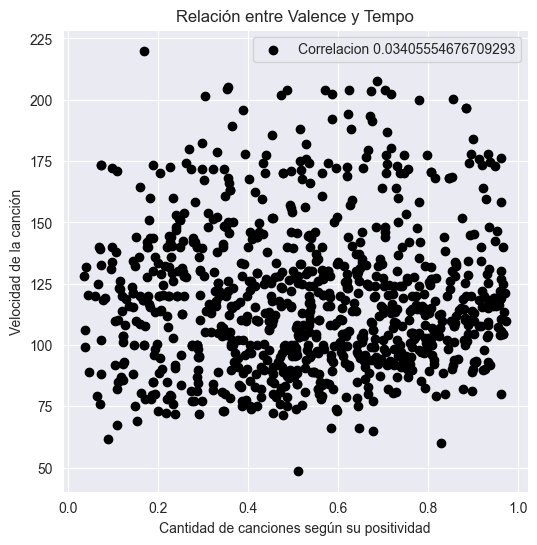

In [71]:
#Primero vamos a crear el scatter plot
plt.figure(figsize=(6, 6))  # Hacer el gráfico cuadrado

#Calculamos el coeficiente de correlación con numpy
coeficiente_correlacion = np.corrcoef(copy_covers_ds['Valence'], copy_covers_ds['Tempo'])[0,1]

# Graficamos el scatter
plt.scatter(copy_covers_ds['Valence'], copy_covers_ds['Tempo'], label=f'Correlacion {coeficiente_correlacion}', color='black')

# Agregamos las etiquetas a los ejes
plt.xlabel("Cantidad de canciones según su positividad")
plt.ylabel("Velocidad de la canción")

# Agregamos el título
plt.title("Relación entre Valence y Tempo")

# Agregamos una leyenda
plt.legend()

# Mostramos el gráfico de dispersión
plt.show()

De primeras no podemos observar nada con el Scatter Plot. Podemos separar Valance en varios grupos para analiza el tempo promedio dentro de cada grupo. Primero observaremos la distribución de Valence para poder identificar los grupos

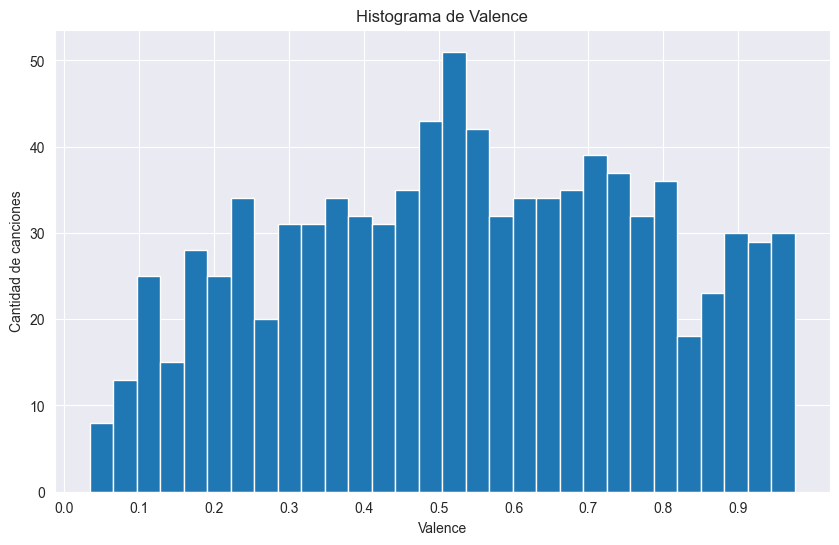

In [72]:
import numpy as np

# Ordenamos los datos
valence_sort = copy_covers_ds['Valence'].sort_values()

# Definimos el número de intervalos (bins)
bins = 30

# Graficamos el histograma
plt.figure(figsize=(10, 6))
plt.hist(valence_sort, bins=bins)

# Añadimos título y etiquetas
plt.title('Histograma de Valence')
plt.xlabel('Valence')
plt.ylabel('Cantidad de canciones')
plt.xticks(np.arange(0,1,0.1))

# Mostramos el gráfico
plt.show()

Una buena medición sería tomar tres grupos: de 0.0 a 0.3(baja positividad), de 0.3 a 0.6(media positividad) y de 0.6 a 1.0(alta positividad)

In [73]:
#Hamos los bins para separar los grupos
bins = [0.0, 0.3, 0.6, 1.0]
#Definimos las labels
labels = ['baja_positividad', 'media_positividad', 'alta_positividad']
#Armamos los grupos
copy_covers_ds['Valence_groups']= pd.cut(copy_covers_ds['Valence'], bins=bins, labels=labels)

C:\Users\axelt\AppData\Local\Temp\ipykernel_12016\267464240.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_covers_ds['Valence_groups']= pd.cut(copy_covers_ds['Valence'], bins=bins, labels=labels)


Hacemos el boxplot para ver las distribuciones de los grupos de Valence en Tempo

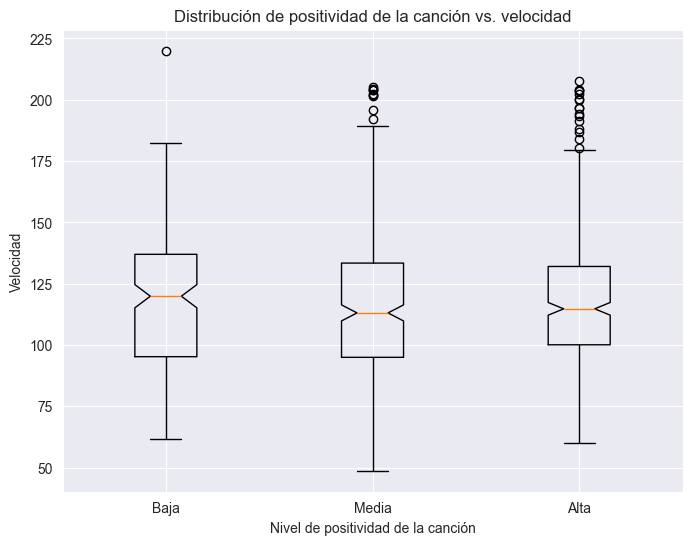

In [74]:
# Crear el boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([copy_covers_ds[copy_covers_ds["Valence_groups"] == "baja_positividad"]["Tempo"],
             copy_covers_ds[copy_covers_ds["Valence_groups"] == "media_positividad"]["Tempo"],
             copy_covers_ds[copy_covers_ds["Valence_groups"] == "alta_positividad"]["Tempo"]],
             tick_labels=["Baja", "Media", "Alta"], notch=True)

# Agregar etiquetas a los ejes
plt.xlabel("Nivel de positividad de la canción")
plt.ylabel("Velocidad")

# Agregar un título al gráfico
plt.title("Distribución de positividad de la canción vs. velocidad")

# Mostrar el gráfico
plt.show()


Basándonos en la información del box plot parece no haber una diferencia significativa entre los grupos. Comprobaremos si esto es o no así con alguna prueba estadística como ANOVA o Kruskal-Wallis. Primero, verifiquemos normalidad en los grupos con Shapiro-Wilks

In [75]:
from scipy.stats import shapiro

# Separamos los datos en tres grupos, poca energia, media energia y alta energia
poca_positividad = copy_covers_ds[copy_covers_ds['Valence_groups'] == 'baja_positividad']['Tempo']
media_positividad = copy_covers_ds[copy_covers_ds['Valence_groups'] == 'media_positividad']['Tempo']
alta_positividad = copy_covers_ds[copy_covers_ds['Valence_groups'] == 'alta_positividad']['Tempo']

# Test de Shapiro-Wilk para poca energia
stat, p = shapiro(poca_positividad)
print(f"Test de Shapiro-Wilk para poca positividad: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para media energia
stat, p = shapiro(media_positividad)
print(f"Test de Shapiro-Wilk para media positividad Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para alta energia
stat, p = shapiro(alta_positividad)
print(f"Test de Shapiro-Wilk para alta positividad: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para poca positividad: Estadístico=0.977, p-valor=0.003
Test de Shapiro-Wilk para media positividad Estadístico=0.953, p-valor=0.000
Test de Shapiro-Wilk para alta positividad: Estadístico=0.924, p-valor=0.000


Por lo tanto, los datos no respetan una distribución normal. Comprobaremos la homocedastecidad de los datos mediante el test de Levene. De esta manera podremos determinar si existe una diferencia significativa entre las varianzas de los grupos

In [76]:
import scipy.stats as stats
stat, p = stats.levene(poca_positividad, media_positividad, alta_positividad)
print(f"Test de Levene para grupos de energia: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para grupos de energia: Estadístico=2.144, p-valor=0.118


El test de Levene nos dice que las variazas no son significativamente diferentes entre sí(son homocedásticos). Podemos aplicar Kruskal-Wallis para ver si existen diferencias significativas en Tempo entre los grupos de Valence.

In [77]:
import scipy.stats as stats
# Test de Kruskal-Wallis para comparar el tempo  entre canciones con distintos niveles de positividad
stat, p = stats.kruskal(poca_positividad, media_positividad, alta_positividad)
print(f"Test de Kruskal-Wallis para Tempo: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en el nivel de bailabilidad entre canciones con distintos niveles de energía.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en el nivel de bailabilidad entre canciones con distintos niveles de energía.")

Test de Kruskal-Wallis para Tempo: Estadístico=2.061, p-valor=0.357
No hay suficiente evidencia para rechazar la hipótesis nula.
No hay una diferencia significativa en el nivel de bailabilidad entre canciones con distintos niveles de energía.


Por lo tanto, podemos concluir con que no hay evidencia suficiente para apoyar la hipótesis de que las canciones más positivas tienen tempos más altos

### Analisis de ```Liveness vs Popularity```

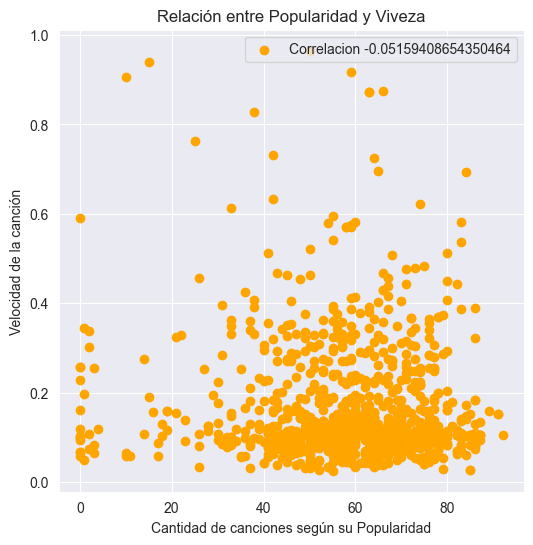

In [78]:
#Primero vamos a crear el scatter plot
plt.figure(figsize=(6, 6))  # Hacer el gráfico cuadrado

#Calculamos el coeficiente de correlación con numpy
coeficiente_correlacion = np.corrcoef(copy_covers_ds['Popularity'], copy_covers_ds['Liveness'])[0,1]

# Graficamos el scatter
plt.scatter(copy_covers_ds['Popularity'], copy_covers_ds['Liveness'], label=f'Correlacion {coeficiente_correlacion}', color='orange')

# Agregamos las etiquetas a los ejes
plt.xlabel("Cantidad de canciones según su Popularidad")
plt.ylabel("Velocidad de la canción")

# Agregamos el título
plt.title("Relación entre Popularidad y Viveza")

# Agregamos una leyenda
plt.legend()

# Mostramos el gráfico de dispersión
plt.show()

No importaba que p valor planteramos que nustras hipotesis seria rechazada, si supondriamos una confianza del 0.95 o de 0.7 no llegabamos ni aunque quiesieramos. El valor de correlacion muy cercano a 0 supondria que ambas variables son altamente independientes entre si o tienen un relacion que no es lineal. En el Scatter plot si miramos bien muy difusamente se puede ver una especie de parabola aunque no bien definida. Lo que si podemos asegurar es que no existe una relacion lineal entre ambas. Una mayor presencia de audiencia en el track no supone una mayor popularidad.

In [79]:
copy_covers_ds.describe()

,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,3.951488,0.626065,0.630042,5.435502,-8.100806,0.651599,0.075937,0.222169,0.043193,0.172322,0.535718,118.912936,57.771775,1994.413451
std,0.265503,0.151518,0.195033,3.506062,3.153500,0.476727,0.079800,0.245969,0.155259,0.138637,0.243739,29.605926,17.598971,2.926992
min,1.000000,0.174000,0.060400,0.000000,-19.310000,0.000000,0.023000,0.000004,0.000000,0.025000,0.034800,48.718000,0.000000,1990.000000
25%,4.000000,0.520000,0.492500,2.000000,-10.010500,0.000000,0.032200,0.028950,0.000000,0.088850,0.345500,97.068500,49.000000,1992.000000
50%,4.000000,0.633000,0.640000,6.000000,-7.556000,1.000000,0.042800,0.118000,0.000005,0.119000,0.536000,115.035000,60.000000,1994.000000
75%,4.000000,0.738500,0.780500,9.000000,-5.733000,1.000000,0.076250,0.333500,0.000615,0.218500,0.730500,133.424000,70.000000,1997.000000
max,5.000000,0.979000,0.999000,11.000000,0.919000,1.000000,0.529000,0.986000,0.958000,0.965000,0.975000,219.973000,92.000000,1999.000000


Antes de PCA: (907, 10)
Después de PCA: (907, 2)


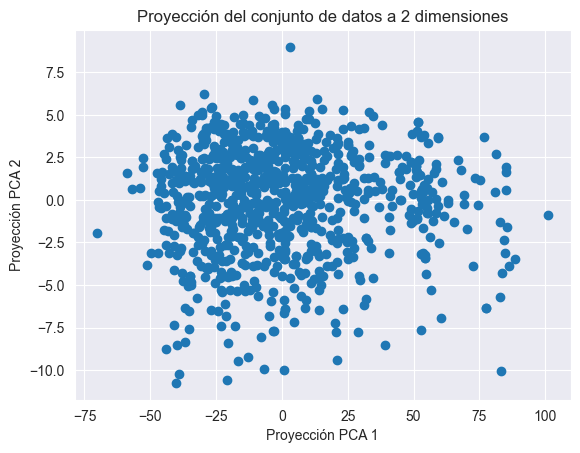

In [80]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

#Sacamos todo lo que no sea continuo y lo que vamos a pintar
X = copy_covers_ds.drop(['Duration', 'Mode','Track','Artist','Key','Year','Popularity','Instrumentalness Type', 'Valence_groups'], axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#
pca = PCA(n_components=2, whiten=False)


principalComponents = pca.fit_transform(X)

print('Antes de PCA: {}'.format(X.shape))
print('Después de PCA: {}'.format(principalComponents.shape))


plt.scatter(principalComponents[:,0], principalComponents[:,1])
plt.grid(True)
plt.xlabel('Proyección PCA 1')
plt.ylabel('Proyección PCA 2')
plt.title('Proyección del conjunto de datos a 2 dimensiones')
plt.show()

In [81]:
pca.__dict__

{'n_components': 2,
 'copy': True,
 'whiten': False,
 'svd_solver': 'auto',
 'tol': 0.0,
 'iterated_power': 'auto',
 'n_oversamples': 10,
 'power_iteration_normalizer': 'auto',
 'random_state': None,
 'feature_names_in_': array(['Time_Signature', 'Danceability', 'Energy', 'Loudness',
        'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness',
        'Valence', 'Tempo'], dtype=object),
 'n_features_in_': 10,
 '_fit_svd_solver': 'covariance_eigh',
 'mean_': array([ 3.95148842e+00,  6.26065050e-01,  6.30042337e-01, -8.10080595e+00,
         7.59368247e-02,  2.22169285e-01,  4.31929955e-02,  1.72322492e-01,
         5.35717751e-01,  1.18912936e+02]),
 'noise_variance_': np.float64(0.033883182466985934),
 'n_samples_': 907,
 'n_components_': 2,
 'components_': array([[-1.66873849e-04, -8.24921173e-04,  9.16677087e-04,
          1.18641166e-02,  3.27831800e-04, -9.80559884e-04,
          1.21871408e-04, -2.34644935e-04,  2.81819158e-04,
          9.99928235e-01],
        [ 6.9436

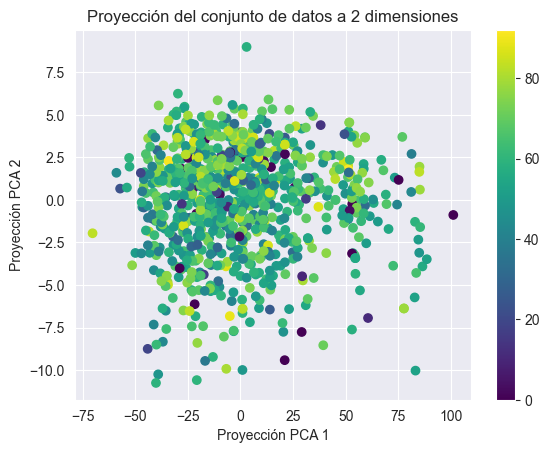

In [82]:

plt.scatter(principalComponents[:,0], principalComponents[:,1], c=copy_covers_ds["Popularity"], cmap='viridis')
plt.grid(True)
plt.xlabel('Proyección PCA 1')
plt.ylabel('Proyección PCA 2')
plt.title('Proyección del conjunto de datos a 2 dimensiones')
plt.colorbar()
plt.show()

Before t-SNE: (907, 10)
After t-SNE: (907, 2)


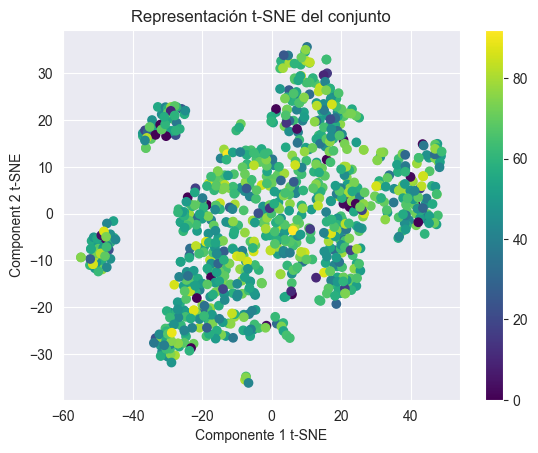

In [83]:
# importamos el t-SNE
from sklearn.manifold import TSNE


X_tsne = TSNE(n_components=2, random_state=10).fit_transform(X_scaled)  


print('Before t-SNE: {}'.format(X_scaled.shape))
print('After t-SNE: {}'.format(X_tsne.shape))


plt.scatter(X_tsne[:,0], X_tsne[:,1], c=copy_covers_ds["Popularity"], cmap='viridis')
plt.grid(True)
plt.xlabel('Componente 1 t-SNE')
plt.ylabel('Component 2 t-SNE')
plt.title('Representación t-SNE del conjunto')
plt.colorbar()
plt.show()

Se ve que en ambos casos no hay una relacion entre las demas caracteristicas del dataset y la popularidad.

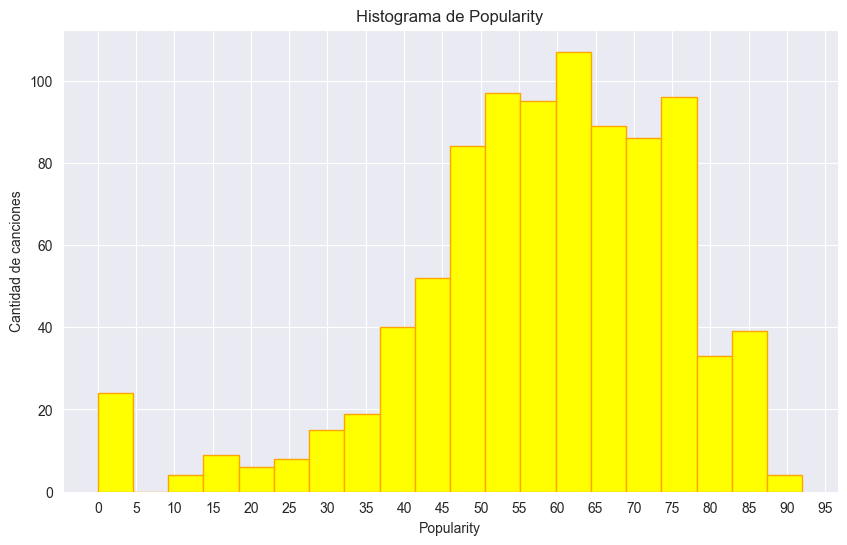

In [84]:
import numpy as np

# Ordenamos los datos
popularity_sort = copy_covers_ds['Popularity'].sort_values()

# Definimos el número de intervalos (bins)
bins = 20

# Graficamos el histograma
plt.figure(figsize=(10, 6))
plt.hist(popularity_sort, bins=bins, color='yellow', edgecolor='orange')

# Añadimos título y etiquetas
plt.title('Histograma de Popularity')
plt.xlabel('Popularity')
plt.ylabel('Cantidad de canciones')
plt.xticks(np.arange(0,100,5))

# Mostramos el gráfico
plt.show()

Podemos separar por la moda. Para hacer un analisis de que tan significativa estadisticamente es la diferencia entre el promedio de liveness entre ambos grupos

In [85]:

copy_covers_ds['Popularity_groups'] = pd.NA
#Por cada registro hacemos:
for index,row in copy_covers_ds.iterrows():
    
    popularidad = row['Popularity']
    if popularidad >= 75:
        popularity_group = 'upper_group'
    elif popularidad < 45:
        popularity_group = 'lower_group'
    else: 
        popularity_group = 'medium_group'
        
    copy_covers_ds.at[index,'Popularity_groups'] = popularity_group

C:\Users\axelt\AppData\Local\Temp\ipykernel_12016\3415182652.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_covers_ds['Popularity_groups'] = pd.NA


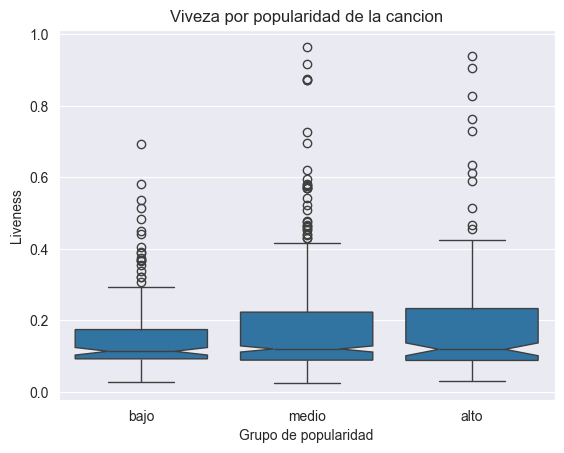

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.boxplot(x='Popularity_groups', y='Liveness', data=copy_covers_ds, notch=True)
plt.title("Viveza por popularidad de la cancion")
plt.xlabel("Grupo de popularidad")
plt.xticks(ticks=[0,1,2], labels=["bajo", "medio","alto"])
plt.ylabel("Liveness")
plt.show()


Un monton de outliers! Ya por el acogotamiento se podria decir que la diferencia no va a ser significativa. Pero vamos a darle un toque mas empirico al analisis.

In [87]:
copy_popularity_liveness = copy_covers_ds[copy_covers_ds['Liveness'] < 0.25]

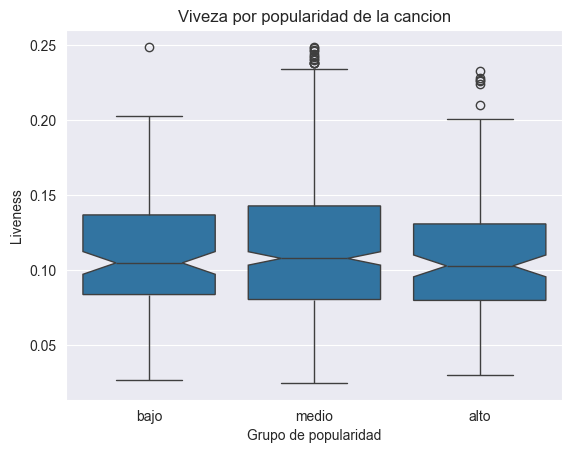

In [88]:
sns.boxplot(x='Popularity_groups', y='Liveness', data=copy_popularity_liveness, notch=True)
plt.title("Viveza por popularidad de la cancion")
plt.xlabel("Grupo de popularidad")
plt.xticks(ticks=[0,1,2], labels=["bajo", "medio","alto"])
plt.ylabel("Liveness")
plt.show()

In [89]:
from scipy.stats import shapiro


upper_mode_songs = copy_popularity_liveness[copy_popularity_liveness['Popularity_groups'] == 'upper_group']['Liveness']
lower_mode_songs = copy_popularity_liveness[copy_popularity_liveness['Popularity_groups'] == 'lower_group']['Liveness']
medium_mode_songs = copy_popularity_liveness[copy_popularity_liveness['Popularity_groups'] == 'lower_group']['Liveness']


stat, p = shapiro(upper_mode_songs)
print(f"Test de Shapiro-Wilk para canciones por encima de la moda: Estadístico={stat:.3f}, p-valor={p:.3f}")

stat, p = shapiro(medium_mode_songs)
print(f"Test de Shapiro-Wilk para canciones por debajo de la mdoa: Estadístico={stat:.3f}, p-valor={p:.3f}")

stat, p = shapiro(lower_mode_songs)
print(f"Test de Shapiro-Wilk para canciones por debajo de la mdoa: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para canciones por encima de la moda: Estadístico=0.978, p-valor=0.043
Test de Shapiro-Wilk para canciones por debajo de la mdoa: Estadístico=0.946, p-valor=0.000
Test de Shapiro-Wilk para canciones por debajo de la mdoa: Estadístico=0.946, p-valor=0.000


p valores muy cercanos a 0, solo paso los del grupo superior, no son normales. Chau test t. Veamos homocedasticidad.

In [90]:
import scipy.stats as stats
stat, p = stats.levene(upper_mode_songs, lower_mode_songs)
print(f"Test de Levene para Liveness entre ambos grupos de canciones: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para Liveness entre ambos grupos de canciones: Estadístico=1.921, p-valor=0.167


p valor por encima de 0.05, que alegria!! yuppie!!, se corrobora que son homocedasticos. Hagamos Mann Whitney!

In [91]:

stat, p = stats.mannwhitneyu(upper_mode_songs, lower_mode_songs)
print(f"Test de Mann-Whitney : Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en en Liveness de las canciones por encima de la moda y por debajo")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en el Liveness en las canciones por encima de la moda y por debajo")

Test de Mann-Whitney : Estadístico=7565.500, p-valor=0.653
No hay suficiente evidencia para rechazar la hipótesis nula.
No hay una diferencia significativa en en Liveness de las canciones por encima de la moda y por debajo


Como habiamo predicho al inicio desde el analisis visual del acogotamiento de los box plots no existe una diferencia significativa para poder asegurar que el liveness de las canciones es diferente.

Pero no nos rindamos aca!, puede haber una relacion entre liveness y el Mode(tono mayor o tono menor) de las canciones.

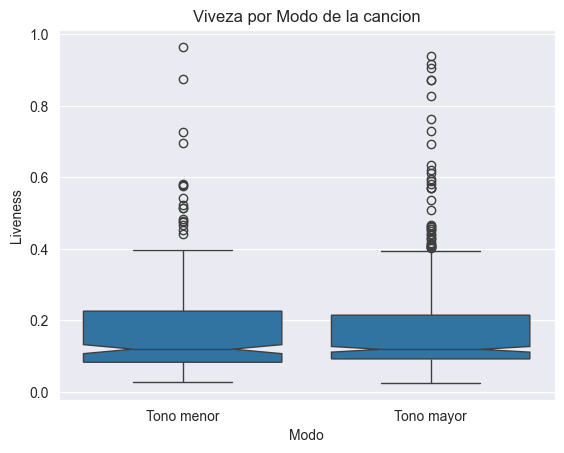

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.boxplot(x='Mode', y='Liveness', data=copy_covers_ds, notch=True)
plt.title("Viveza por Modo de la cancion")
plt.xlabel("Modo")
plt.xticks(ticks=[0, 1], labels=["Tono menor", "Tono mayor"])
plt.ylabel("Liveness")
plt.show()

In [93]:
copy_covers_ds = copy_covers_ds[copy_covers_ds['Liveness'] < 0.4]

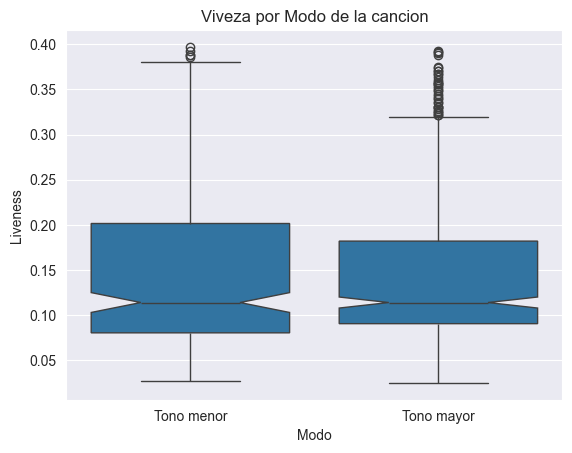

In [94]:
sns.boxplot(x='Mode', y='Liveness', data=copy_covers_ds, notch=True)
plt.title("Viveza por Modo de la cancion")
plt.xlabel("Modo")
plt.xticks(ticks=[0, 1], labels=["Tono menor", "Tono mayor"])
plt.ylabel("Liveness")
plt.show()

In [95]:
from scipy.stats import shapiro


tono_alto = copy_covers_ds[copy_covers_ds['Mode'] == 1]['Liveness']
tono_bajo = copy_covers_ds[copy_covers_ds['Mode'] == 0]['Liveness']


stat, p = shapiro(tono_alto)
print(f"Test de Shapiro-Wilk para canciones con tono alto: Estadístico={stat:.3f}, p-valor={p:.3f}")


stat, p = shapiro(tono_bajo)
print(f"Test de Shapiro-Wilk para canciones con tono bajo: Estadístico={stat:.3f}, p-valor={p:.3f}")


Test de Shapiro-Wilk para canciones con tono alto: Estadístico=0.870, p-valor=0.000
Test de Shapiro-Wilk para canciones con tono bajo: Estadístico=0.870, p-valor=0.000


No es normal! :(

In [96]:
stat, p = stats.levene(tono_alto, tono_bajo)
print(f"Test de Levene para Liveness: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para Liveness: Estadístico=5.134, p-valor=0.024


No son homosedasticos, hay que ir a los no parametricos! : Kruskal Wallis

In [97]:

stat, p = stats.kruskal(tono_alto, tono_bajo)
print(f"Test de Kruskal-Wallis para Liveness: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en el Liveness entre canciones de tono alto y tono bajo.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en el Liveness entre canciones de tono alto y tono bajo.")

Test de Kruskal-Wallis para Liveness: Estadístico=0.541, p-valor=0.462
No hay suficiente evidencia para rechazar la hipótesis nula.
No hay una diferencia significativa en el Liveness entre canciones de tono alto y tono bajo.


Como podemos ver no llegamos a nada, la diferencia no es la suficiente como para poder asegurar algo! que triste...

### Analisis de ```Danceability vs Energy```

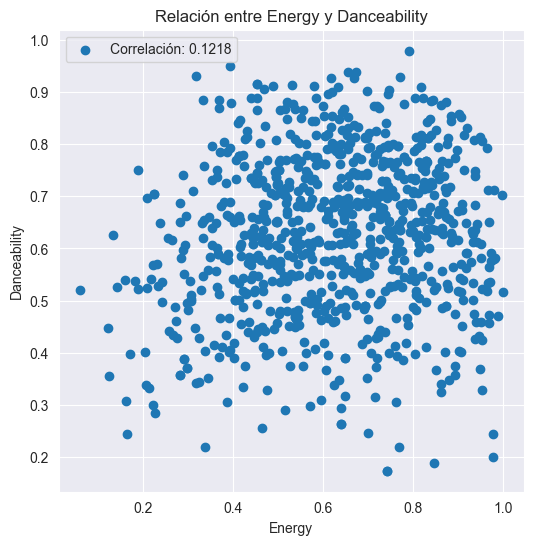

In [98]:
import matplotlib.pyplot as plt
import scipy.stats as stats
variable_1 = "Energy"
variable_2 = "Danceability"

# Extraer las columnas del DataFrame
datos_columna1 = copy_covers_ds[variable_1]
datos_columna2 = copy_covers_ds[variable_2]

# creamos el scatter plot
plt.figure(figsize=(6, 6))  
plt.scatter(copy_covers_ds[variable_1], copy_covers_ds[variable_2])
plt.xlabel(variable_1)
plt.ylabel(variable_2)
plt.title("Relación entre {} y {}".format(variable_1, variable_2))

# calcular la correlación de Pearson usando SciPy
coeficiente_correlacion, _ = stats.pearsonr(datos_columna1, datos_columna2)
# agregar la leyenda con el valor del coeficiente de correlación
plt.legend([f"Correlación: {coeficiente_correlacion:.4f}"], loc="upper left")

# Mostrar el gráfico
plt.grid(True)
plt.show()

A simple vista solo se ve una nube de puntos sin direccion. La correlacion dda muy baja, del 0.13. No logramos detectar visualmente si podria llegar a existir otro tipo de relacion que no sea lineal.

Podemos probar a ver si existen grupos dentro de Energy 

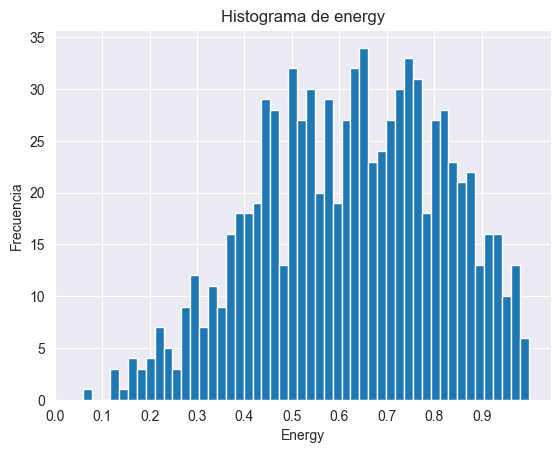

In [99]:
bins = 50

plt.hist(copy_covers_ds['Energy'], bins = bins)

plt.xlabel('Energy')
plt.ylabel('Frecuencia')
plt.title('Histograma de energy')
plt.xticks(np.arange(0, 1, 0.1))
plt.show()

Podemos separarlo en 3 grupos. Uno que vaya de 0.0 a 0.3(baja energia), otro de 0.3 a 0.6(energia media) y de 0.6 a 1.0(mucha energia)

In [100]:
#Hamos los bins para separar los grupos
bins = [0.0, 0.3, 0.6, 1.0]
#Definimos las labels
labels = ['baja_energia', 'media_energia', 'alta_energia']
#Armamos los grupos
copy_covers_ds['Energy_groups']= pd.cut(copy_covers_ds['Energy'], bins=bins, labels=labels)

Ahora hacemos un boxplot para comparar la variabilidad de cada grupo respecto a los valores de Danceability

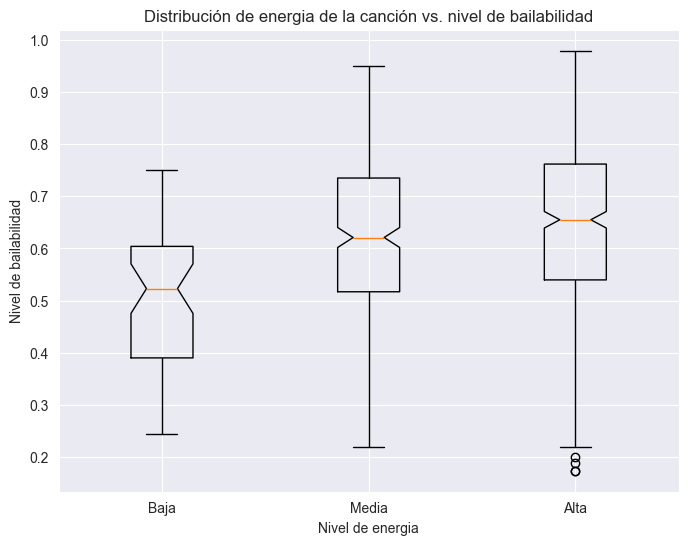

In [101]:
# Crear el boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([copy_covers_ds[copy_covers_ds["Energy_groups"] == "baja_energia"]["Danceability"],
             copy_covers_ds[copy_covers_ds["Energy_groups"] == "media_energia"]["Danceability"],
             copy_covers_ds[copy_covers_ds["Energy_groups"] == "alta_energia"]["Danceability"]],
             tick_labels=["Baja", "Media", "Alta"], notch=True)

# Agregar etiquetas a los ejes
plt.xlabel("Nivel de energia")
plt.ylabel("Nivel de bailabilidad")

# Agregar un título al gráfico
plt.title("Distribución de energia de la canción vs. nivel de bailabilidad")

# Mostrar el gráfico
plt.show()


Vemos que existe una diferencia significativa entre el primer grupo y los demás. Sin embargo, no existe tal diferencia entre el grupo dos y el tres
Para ver si existen o no diferencias estadísticamente significativas entre los grupos con ANOVA

Primero tendremos que verificar los supuestos de ANOVA. Empezaremos con la normalidad de los datos

In [102]:
from scipy.stats import shapiro

# Separamos los datos en tres grupos, poca energia, media energia y alta energia
poca_energia = copy_covers_ds[copy_covers_ds['Energy_groups'] == 'baja_energia']['Danceability']
media_energia = copy_covers_ds[copy_covers_ds['Energy_groups'] == 'media_energia']['Danceability']
alta_energia = copy_covers_ds[copy_covers_ds['Energy_groups'] == 'alta_energia']['Danceability']

# Test de Shapiro-Wilk para poca energia
stat, p = shapiro(poca_energia)
print(f"Test de Shapiro-Wilk para poca energia: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para media energia
stat, p = shapiro(media_energia)
print(f"Test de Shapiro-Wilk para media energia Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para alta energia
stat, p = shapiro(alta_energia)
print(f"Test de Shapiro-Wilk para alta energia: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para poca energia: Estadístico=0.975, p-valor=0.368
Test de Shapiro-Wilk para media energia Estadístico=0.992, p-valor=0.092
Test de Shapiro-Wilk para alta energia: Estadístico=0.982, p-valor=0.000


Hacemos un QQ-plot para hacer la comprobación de normalidad

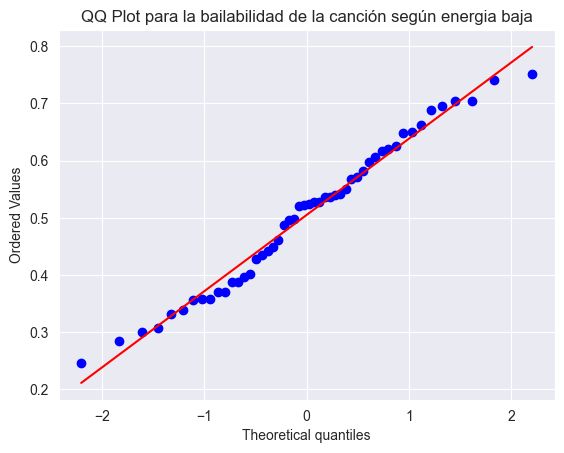

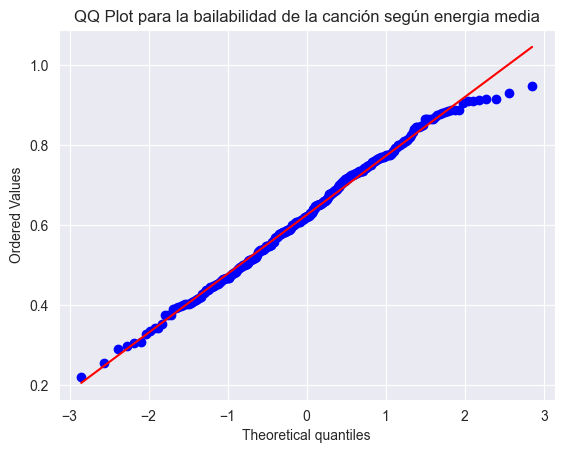

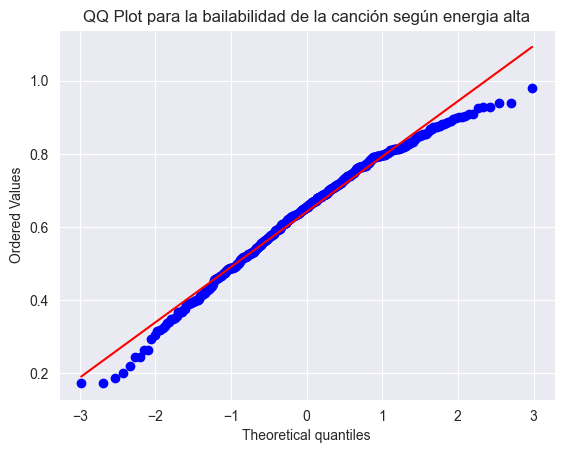

In [103]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# QQ plot para energia baja
stats.probplot(poca_energia, dist="norm", plot=plt)
plt.title("QQ Plot para la bailabilidad de la canción según energia baja")
plt.show()

# QQ plot para energia media
stats.probplot(media_energia, dist="norm", plot=plt)
plt.title("QQ Plot para la bailabilidad de la canción según energia media")
plt.show()

#QQ plot para energia alta
stats.probplot(alta_energia, dist="norm", plot=plt)
plt.title("QQ Plot para la bailabilidad de la canción según energia alta")
plt.show()

En conclusión, ni Shapiro ni el QQ-plot nos están mostrando normalidad en los datos, así que no podemos usar el test de ANOVA.

Comprobaremos la homocedastecidad de los datos mediante el test de Levene. De esta manera podremos determinar si existe una diferencia significativa entre las varianzas de los grupos

In [104]:
stat, p = stats.levene(poca_energia, media_energia, alta_energia)
print(f"Test de Levene para grupos de energia: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para grupos de energia: Estadístico=0.569, p-valor=0.566


Por el test de Levene comprobamos que existe homocedasticidad en los grupos. Por lo tanto podemos aplicar el test de Kruskal-Wallis para conocer si son o no estadísticamente diferentes entre sí

In [105]:
# Test de Kruskal-Wallis para comparar el nivel de bailabilidad entre canciones con distintos niveles de energía
stat, p = stats.kruskal(poca_energia, media_energia, alta_energia)
print(f"Test de Kruskal-Wallis para Danceability: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en el nivel de bailabilidad entre canciones con distintos niveles de energía.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en el nivel de bailabilidad entre canciones con distintos niveles de energía.")

Test de Kruskal-Wallis para Danceability: Estadístico=36.568, p-valor=0.000
Se rechaza la hipótesis nula.
Existe una diferencia significativa en el nivel de bailabilidad entre canciones con distintos niveles de energía.


Por lo tanto, podemos afirmar que existen diferencias significativas entre los grupos. Es decir que efectivamente, para niveles más bajos de energía, las canciones son menos bailables y, para niveles más altos, las canciones tienen características que las hacen más bailables
Se ve una gran diferencia entre el nivel más bajo de energía con el nivel más alto, pero no tento entre el nivel medio y el más alto, cosa que a primeras parece un poco sospechoso

### Análisis de ```Valence vs Mode```

Ahora analizaremos la relación que existe entre el nivel de positividad de la canción y el tono en el que se escribió(mayor o menor)<br>
Para ello, dividiremos la variable Valance según el Mode(0 o 1)

In [106]:
# Filtrar las canciones en modo menor (Mode = 0) y modo mayor (Mode = 1)
valence_menor = copy_covers_ds[copy_covers_ds['Mode'] == 0]['Valence']
valence_mayor = copy_covers_ds[copy_covers_ds['Mode'] == 1]['Valence']

In [107]:
valence_menor.describe()

count    299.000000
mean       0.562994
std        0.230426
min        0.070600
25%        0.390500
50%        0.569000
75%        0.751000
max        0.970000
Name: Valence, dtype: float64

In [108]:
valence_mayor.describe()

count    552.000000
mean       0.521416
std        0.252070
min        0.034800
25%        0.313500
50%        0.519000
75%        0.722000
max        0.975000
Name: Valence, dtype: float64

Se puede ver observando los valores de media y mediana que, en promedio, las canciones en modo menor tienen un Valence (positividad) ligeramente superior, aunque la diferencia es pequeña<br>
La desviación estándar es similar en ambos grupos (0.23 para menor y 0.25 para mayor), es decir, la variabilidad es comparable.<br>
Dado que las medias y medianas no difieren significativamente a simple vista, una prueba de Mann-Whitney o un test T podría confirmar si estas diferencias son significativas

Podemos hacer un boxplot para ver esta diferencia de forma gráfica

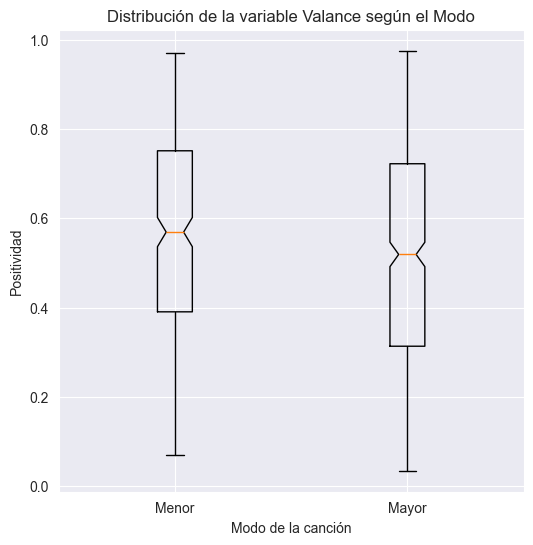

In [109]:
plt.figure(figsize=(6, 6)) 
plt.boxplot([copy_covers_ds[copy_covers_ds['Mode'] == 0]['Valence'], copy_covers_ds[copy_covers_ds['Mode'] == 1]['Valence']], tick_labels=["Menor", "Mayor"], notch=True)
# Agregar etiquetas a los ejes
plt.xlabel("Modo de la canción")
plt.ylabel("Positividad")

# Agregar un título al gráfico
plt.title("Distribución de la variable Valance según el Modo")

# Mostrar el gráfico
plt.show()

Como se observa, las diferencias son poco apreciables pero hay que ver si estadísticamente son significativas o no

In [110]:
from scipy.stats import shapiro

# Test de Shapiro-Wilk para valence con modo menor
stat, p = shapiro(valence_menor)
print(f"Test de Shapiro-Wilk para poca energia: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para valence con modo mayor
stat, p = shapiro(valence_mayor)
print(f"Test de Shapiro-Wilk para media energia Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para poca energia: Estadístico=0.974, p-valor=0.000
Test de Shapiro-Wilk para media energia Estadístico=0.969, p-valor=0.000


Como no comprobamos normalidad, no podemos tirarnos por hacer un test t.

Dado que no se comprobó normalidad para el test T, solo nos queda probar con Mann-Whitney U

In [111]:
# Test de Mann-Whitney U para comparar Valence entre modo menor y modo mayor(escala menor y mayor)
stat, p = stats.mannwhitneyu(valence_menor, valence_mayor)
print(f"Test de Mann-Whitney U para Valence : Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en las canciones entre escala mayor o menor.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en las canciones entre escala mayor o menor.")

Test de Mann-Whitney U para Valence : Estadístico=90311.000, p-valor=0.023
Se rechaza la hipótesis nula.
Existe una diferencia significativa en las canciones entre escala mayor o menor.


Por consiguiente, podemos asegurar que las diferencias en las canciones con modo mayor y menor son estadísticamente significativas<br>
Esto sugiere que, en general, las canciones en escala menor tienden a ser más positivas más alto, lo que implica que podrían ser percibidas como más positivas o alegres que las canciones en escala mayor. Es decir que se confirmó lo contrario a lo que suponíamos. Realmente interesante😲

### Análisis de ```Loudness vs Energy```

Queremos ver si la medida de ruido de la canción está relacionada o no con los niveles de energía que posee. Podemos hacer un scatter plot para ver si están correlacionadas linealmente

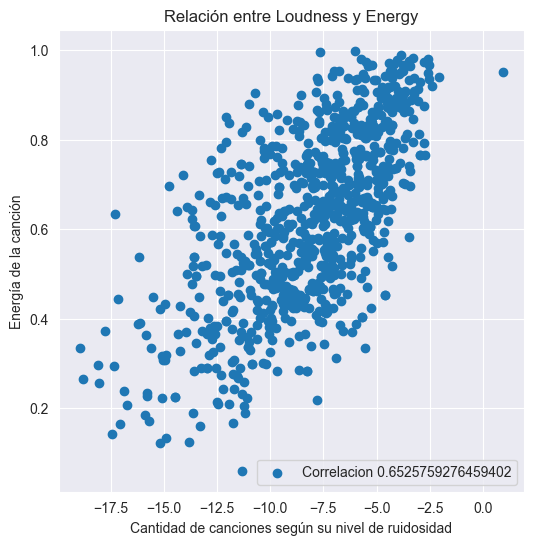

In [112]:
#Primero vamos a crear el scatter plot
plt.figure(figsize=(6, 6))  # Hacer el gráfico cuadrado

#Calculamos el coeficiente de correlación con numpy
coeficiente_correlacion = np.corrcoef(copy_covers_ds['Loudness'], copy_covers_ds['Energy'])[0,1]

# Graficamos el scatter
plt.scatter(copy_covers_ds['Loudness'], copy_covers_ds['Energy'], label=f'Correlacion {coeficiente_correlacion}')

# Agregamos las etiquetas a los ejes
plt.xlabel("Cantidad de canciones según su nivel de ruidosidad")
plt.ylabel("Energía de la canción")

# Agregamos el título
plt.title("Relación entre Loudness y Energy")

# Agregamos una leyenda
plt.legend()

# Mostramos el gráfico de dispersión
plt.show()

Podemos ver que hay una tendencia cuadrática positiva en el gráfico ¿Quizás haya otra relación que no sea lineal?
También podríamos eliminar los outliers que aparecen para ver si están alterando el verdadero valor de la correlación

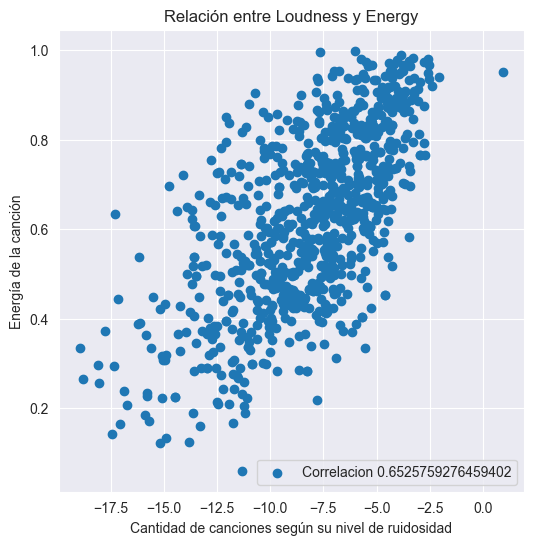

In [113]:
#Nos quedmos solo con los valores superiores a -25
copy_covers_ds = copy_covers_ds[copy_covers_ds['Loudness'] > -25]

#Primero vamos a crear el scatter plot
plt.figure(figsize=(6, 6))  # Hacer el gráfico cuadrado

#Calculamos el coeficiente de correlación con numpy
coeficiente_correlacion = np.corrcoef(copy_covers_ds['Loudness'], copy_covers_ds['Energy'])[0,1]

# Graficamos el scatter
plt.scatter(copy_covers_ds['Loudness'], copy_covers_ds['Energy'], label=f'Correlacion {coeficiente_correlacion}')

# Agregamos las etiquetas a los ejes
plt.xlabel("Cantidad de canciones según su nivel de ruidosidad")
plt.ylabel("Energía de la canción")

# Agregamos el título
plt.title("Relación entre Loudness y Energy")

# Agregamos una leyenda
plt.legend()

# Mostramos el gráfico de dispersión
plt.show()

Ahora eliminando los outliers podemos notar un poco más de presencia lineal en la correlación, lo que podría sugerir que a medida que aumenta la ruidosidad de la canción aumenta los niveles de energía(hipótesis). Sin embargo, para ver si esta correlación es estadísticamente significativa, podemos realizar una prueba de hipótesis usando una prueba de correlación de Pearson

In [114]:
from scipy.stats import pearsonr

coeficiente_correlacion, p_valor = pearsonr(copy_covers_ds['Loudness'], copy_covers_ds['Energy'])
print(f"Coeficiente de correlación: {coeficiente_correlacion}")
print(f"p-valor: {p_valor}")

Coeficiente de correlación: 0.6525759276459402
p-valor: 2.1212704835983363e-104


Como el p-valor dió muy por debajo de los 0.05 indica que la correlación es estadísticamente significativa entre las variables, es decir, la relación no se dio de forma aleatoria e indica una relación real entre ellas. Por lo tanto, esto implica que las canciones con mayor nivel de ruidosidad tienden a ser también las que presentan niveles de energía más altos.

### Análisis de ```¿Energy, liveness y speechieness tienen relacion con el loudness de la cancion?```

Antes de PCA: (851, 3)
Después de PCA: (851, 2)


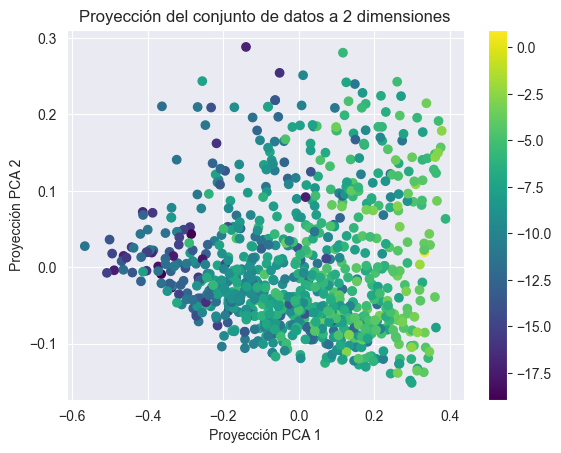

In [115]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

#Sacamos todo lo que no sea continuo y lo que vamos a pintar
X = pd.concat([copy_covers_ds['Energy'],copy_covers_ds['Liveness'],copy_covers_ds['Speechiness']],axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#
pca = PCA(n_components=2, whiten=False)


principalComponents = pca.fit_transform(X)

print('Antes de PCA: {}'.format(X.shape))
print('Después de PCA: {}'.format(principalComponents.shape))


plt.scatter(principalComponents[:,0], principalComponents[:,1],c=copy_covers_ds['Loudness'], cmap='viridis')
plt.grid(True)
plt.xlabel('Proyección PCA 1')
plt.ylabel('Proyección PCA 2')
plt.title('Proyección del conjunto de datos a 2 dimensiones')
plt.colorbar()
plt.show()

In [116]:
pca.__dict__

{'n_components': 2,
 'copy': True,
 'whiten': False,
 'svd_solver': 'auto',
 'tol': 0.0,
 'iterated_power': 'auto',
 'n_oversamples': 10,
 'power_iteration_normalizer': 'auto',
 'random_state': None,
 'feature_names_in_': array(['Energy', 'Liveness', 'Speechiness'], dtype=object),
 'n_features_in_': 3,
 '_fit_svd_solver': 'covariance_eigh',
 'mean_': array([0.62548108, 0.14606052, 0.07512456]),
 'noise_variance_': np.float64(0.0060486116458304835),
 'n_samples_': 851,
 'n_components_': 2,
 'components_': array([[ 0.99167369,  0.1142585 ,  0.05939932],
        [-0.1265863 ,  0.94961675,  0.28671231]]),
 'explained_variance_': array([0.03827795, 0.00729343]),
 'explained_variance_ratio_': array([0.74153349, 0.14129075]),
 'singular_values_': array([5.70405621, 2.48986197])}

Como podemos ver en la reduccion de componentes pintado por loudness hay cierto patron, primero se observa un gradiente que va de izquierda a derecha, de mas frio a mas caliente
Tenemos en total aproximadamente un 88% de la varianza explicada lo cual es bastante bueno. Lo mas importante a observar es que la gran mayoria de la varianza lo aportan Energy en el primer componente y Liveness en el segundo componente. Bajemos el analisis a ellas dos.

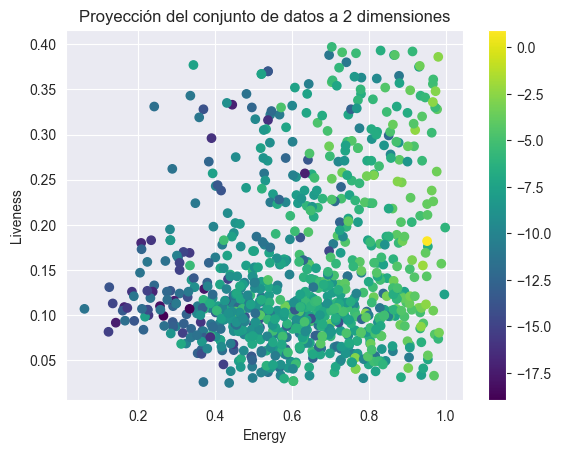

In [117]:
plt.scatter(copy_covers_ds['Energy'], copy_covers_ds['Liveness'],c=copy_covers_ds['Loudness'], cmap='viridis')
plt.grid(True)
plt.xlabel('Energy')
plt.ylabel('Liveness')
plt.title('Proyección del conjunto de datos a 2 dimensiones')
plt.colorbar()
plt.show()

Lo que claramente se ve es que a niveles mas bajos de energy menos ruidosa es al cancion y a mas energy mas ruidosa. Se podria decir que pasa lo mismo con liveness pero es mas difuso, los valores mas bajos de loudness estan atrapados por debajo del 0.20 de liveness pero en esemismo rango cuanto mas energy hay tambien hay valores muy altos de loudness, estando alli un punto naranja que podria considerarse la mas ruidosa. Lo mas interesante es que se sigue manteniendo la misma forma, debe ser porque speechieness no aportaba nada. Ahora bien, si energy y loudness estan tan relacionadas entre si, ellas no influiran sobre alguna otra, la que primero se nos ocurrio es accoustiness, cuando menos ruido y energia tiene la cancion mas acustica es, veamos...

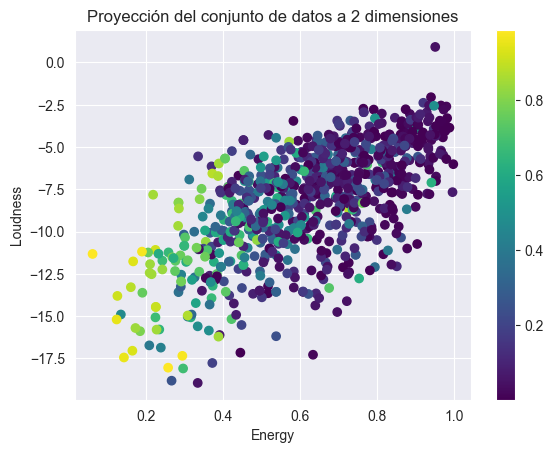

In [118]:
plt.scatter(copy_covers_ds['Energy'], copy_covers_ds['Loudness'],c=copy_covers_ds['Acousticness'], cmap='viridis')
plt.grid(True)
plt.xlabel('Energy')
plt.ylabel('Loudness')
plt.title('Proyección del conjunto de datos a 2 dimensiones')
plt.colorbar()
plt.show()

Primero y principal, la forma se debe a que energy y loudness ya poseian uno de los valores de correlacion mas altos del dataset, segundo que si parece ser cierto que los valores mas altos de acustica estan en los valores mas bajos de loudness y energy!.

### Análisis de ```Speechiness vs Instrumentalness```

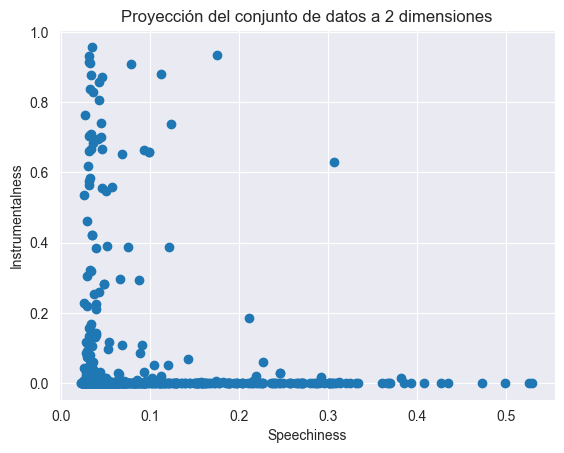

In [119]:
plt.scatter(copy_covers_ds['Speechiness'], copy_covers_ds['Instrumentalness'])
plt.grid(True)
plt.xlabel('Speechiness')
plt.ylabel('Instrumentalness')
plt.title('Proyección del conjunto de datos a 2 dimensiones')
plt.show()

Este es un caso muy interesante ya que ya no estamos hablando de que posean una relacion lineal, estamos hablando de que casi existe dicotomisidad y eso explica el vacio que existe en los valores del medio, o tenes instrumentalizacion o canto no hay punto medio, si es cierto que existen excepciones a la regla pero son casos muy aislados. Seria muy interesante ver que caracteristicas tienen cada grupo de caciones, si GRUPO, porque tranquilamente ambas variables podrian ser 0 1 en base a si son instrumentalizadas o no.

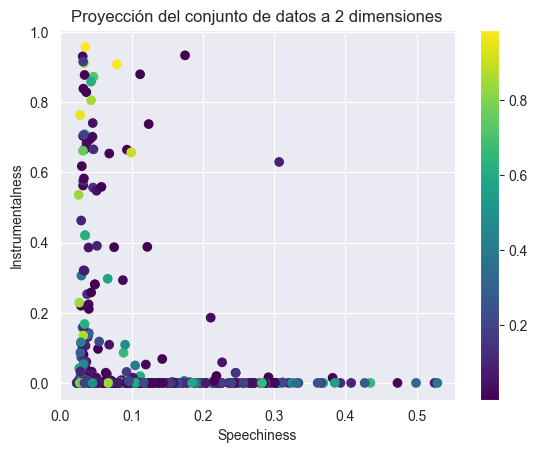

In [120]:
plt.scatter(copy_covers_ds['Speechiness'], copy_covers_ds['Instrumentalness'],c=copy_covers_ds['Acousticness'], cmap='viridis')
plt.grid(True)
plt.xlabel('Speechiness')
plt.ylabel('Instrumentalness')
plt.title('Proyección del conjunto de datos a 2 dimensiones')
plt.colorbar()
plt.show()

Se puede ver que los mayores valores de acustica estan en los valores mas altos de instrumentalizacion.

### Análisis de ```Key vs mode```

In [121]:
from scipy.stats import chi2_contingency
datos_columna1 = copy_covers_ds['Key']
datos_columna2 = copy_covers_ds['Mode']



tabla_contingencia = pd.crosstab(datos_columna1, datos_columna2)

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Estadistico Chi-Cuadrado: ", chi2)
print("p-valor: ", p)
print("Grado de libertad: ", dof)

Estadistico Chi-Cuadrado:  78.42470707500863
p-valor:  2.973397752295682e-12
Grado de libertad:  11


### Análisis de ```Time_Signature vs Popularity```

Una hipotesis que nos planteamos para analizar mas es: Las canciones que no son de 4 pulsaciones por compás son menos populares.

Time Signature es una variable discreta con valores {1,3,4,5} ; Popularity es una variable discreta con valores de minimo: 0 y maximo: 92

Debido a que hay muy pocas muestras de 1, 3 y 5 las juntamos en un grupo, aunque aun asi no constrarestan a las de 4.

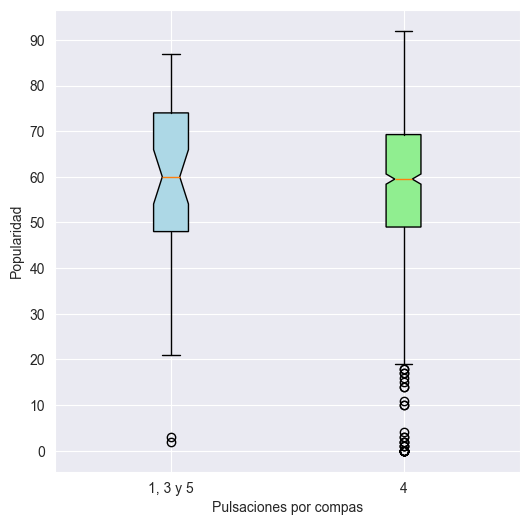

In [122]:
time135 = copy_covers_ds[copy_covers_ds['Time_Signature'].isin([1, 3, 5])]
time4 = copy_covers_ds[copy_covers_ds['Time_Signature'] == 4]

# armamos un boxplot
plt.figure(figsize=(6, 6))
box = plt.boxplot([time135['Popularity'], time4['Popularity']], tick_labels = ["1, 3 y 5", "4"], notch=True, patch_artist=True)

#Colores para cada boxplot
colors = ['lightblue', 'lightgreen']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.xlabel('Pulsaciones por compas')
plt.ylabel('Popularidad')
plt.yticks(range(0, 100, 10))
plt.show()

Al realizar este boxplot vimos que nuestra hipotesís se fue al piso, ya que las canciones que no son de 4 pulsaciones no son muy poco populares, y las que si son tienen una gran variacion, alli encontramos tanto la canción más popular como la menos.

Realizamos una prueba de Chi-Cuadrado para ver si podemos obtener algo más de información

In [123]:
from scipy.stats import chi2_contingency


times_popu = copy_covers_ds[['Time_Signature', 'Popularity']].copy()
times_popu[ 'TimeS4'] = times_popu['Time_Signature'].apply(lambda x: 1 if x == 4 else 0)

variable_1 = "TimeS4"
variable_2 = "Popularity"

datos_columna1 = times_popu[variable_1]
datos_columna2 = times_popu[variable_2]

tabla_contingencia = pd.crosstab(datos_columna1, datos_columna2)

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Estadistico Chi-Cuadrado: ", chi2)
print("p-valor: ", p)
print("Grado de libertad: ", dof)
#print("Frecuencias esperadas: \n ", expected)

Estadistico Chi-Cuadrado:  81.33725917101972
p-valor:  0.43730744627264634
Grado de libertad:  80


Haciendo una prueba de Chi-Cuadrado, la hipótesis sería: 

H0 = Son independientes
H1 = Son dependientes

El p-valor mayor a 0.05, por lo tanto aceptariamos la hipotesis nula, lo que significaria que estadísticamente las variables son independientes. No habria alguna relación.

### Análisis de ```Year vs Popularity```

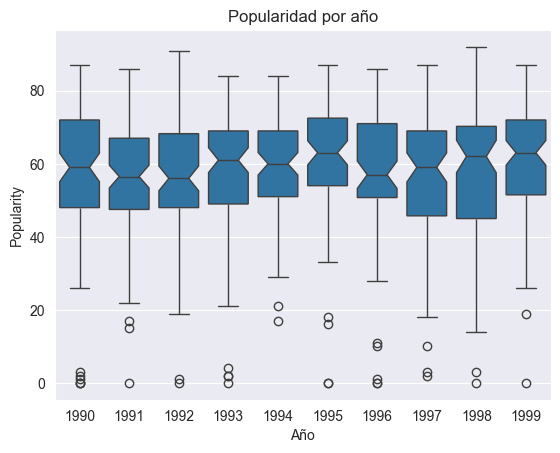

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.boxplot(x='Year', y='Popularity', data=copy_covers_ds, notch=True)
plt.title("Popularidad por año")
plt.xlabel("Año")
plt.xticks(ticks=range(len(copy_covers_ds['Year'].unique())), labels=copy_covers_ds['Year'].unique())
plt.ylabel("Popularity")
plt.show()

In [125]:
#Sacamos algunos outliers
copy_covers_ds = copy_covers_ds[copy_covers_ds['Popularity'] > 18]

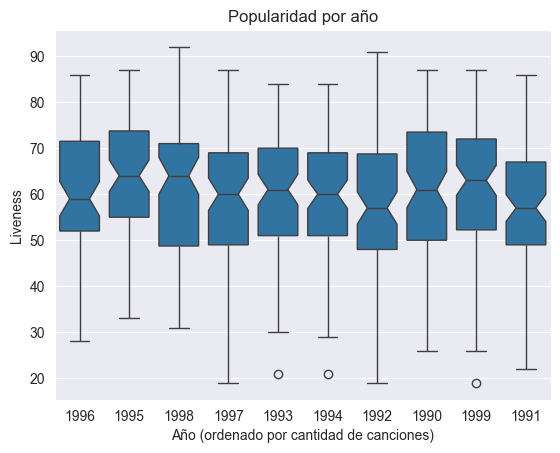

In [126]:
year_counts = copy_covers_ds['Year'].value_counts().sort_values()

# Reordenamos los datos de acuerdo a los años con menos canciones a más canciones
ordered_data = copy_covers_ds.copy()
ordered_data['Year'] = pd.Categorical(ordered_data['Year'], categories=year_counts.index, ordered=True)


sns.boxplot(x='Year', y='Popularity', data=ordered_data, notch=True)
plt.title("Popularidad por año")
plt.xlabel("Año (ordenado por cantidad de canciones)")
plt.ylabel("Liveness")
plt.show()

Si nuestra hipotesis tendria posibilidades de ser cierta tendriamos que ver una tendencia decreciente , siendo los valores de menos canciones(los de la izquierda) mas altos que los valores de popularidad de los años de mas de la derecha(los de mas canciones). No parece ser el caso.

Pero bueno, supongamos que agarramos los mas significativos, por ejemplo 1996 y 1991

In [127]:
copy_1996_1991 = copy_covers_ds[copy_covers_ds['Year'].isin([1996, 1991])]

In [128]:
copy_1996_1991['Year'].value_counts()

Year
1991    93
1996    67
Name: count, dtype: int64

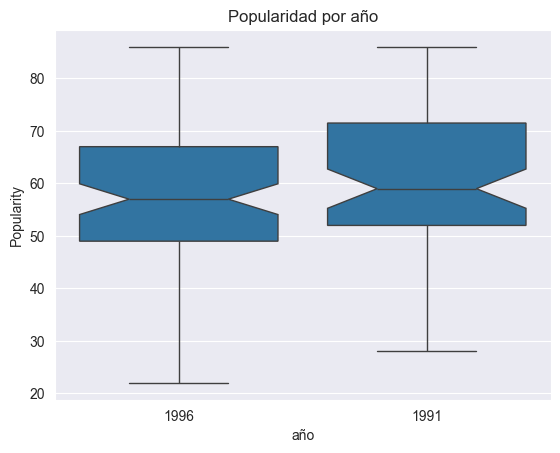

In [129]:
sns.boxplot(x='Year', y='Popularity', data=copy_1996_1991, notch=True)
plt.title("Popularidad por año")
plt.xlabel("año")
plt.xticks(ticks=[0, 1], labels=["1996", "1991"])
plt.ylabel("Popularity")
plt.show()

A simple vista no parece que haya una diferencia significativa, pero tendriamos que verlo estadisticamente.

In [130]:
from scipy.stats import shapiro


covers_1996 = copy_covers_ds[copy_covers_ds['Year'] == 1996]['Popularity']
covers_1991 = copy_covers_ds[copy_covers_ds['Year'] == 1991]['Popularity']


stat, p = shapiro(covers_1996)
print(f"Test de Shapiro-Wilk para canciones por encima de la moda: Estadístico={stat:.3f}, p-valor={p:.3f}")


stat, p = shapiro(covers_1991)
print(f"Test de Shapiro-Wilk para canciones por debajo de la moda: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para canciones por encima de la moda: Estadístico=0.979, p-valor=0.321
Test de Shapiro-Wilk para canciones por debajo de la moda: Estadístico=0.986, p-valor=0.447


Increible, ambas son normales! Homocedasticidad no nos falles porfavor!

In [131]:
import scipy.stats as stats
stat, p = stats.levene(covers_1996, covers_1991)
print(f"Test de Levene para Liveness entre ambos grupos de canciones: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para Liveness entre ambos grupos de canciones: Estadístico=0.152, p-valor=0.697


Gracias homocedasticidad sabiamos que podiamos contar contigo! Test t eres el siguiente

In [132]:
t_statistic, p_value = stats.ttest_ind(covers_1996, covers_1991)
print(f"Test t para Popularity: Estadístico={t_statistic:.3f}, p-valor={p_value:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p_value > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en la popularidad del año 1996 y 1991")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en la  popularidad del año 1996 y 1991")

Test t para Popularity: Estadístico=1.635, p-valor=0.104
No hay suficiente evidencia para rechazar la hipótesis nula.
No hay una diferencia significativa en la popularidad del año 1996 y 1991


Como habíamos predicho, no hay una diferencia significativa entre ambos años. Lo que nada indica que la cantidad de canciones por año tenga una influencia en la popularidad de la canciones.

### Análisis y aplicación de regresión para el conjunto de datos

Ahora bien, también podríamos tratar de predecir la popularidad(variable respuesta) de una canción en base a las características de las canciones de forma tal de conocer cualés son las características fundamentales que provocan que una canción sea mas o menos popular

Para empezar podríamos hacer una matríz de correlación para apreciar las correlaciones entre las diferente variables, para luego prestar atención a las relaciones entre las distintas características de las canciones y la variable respuesta

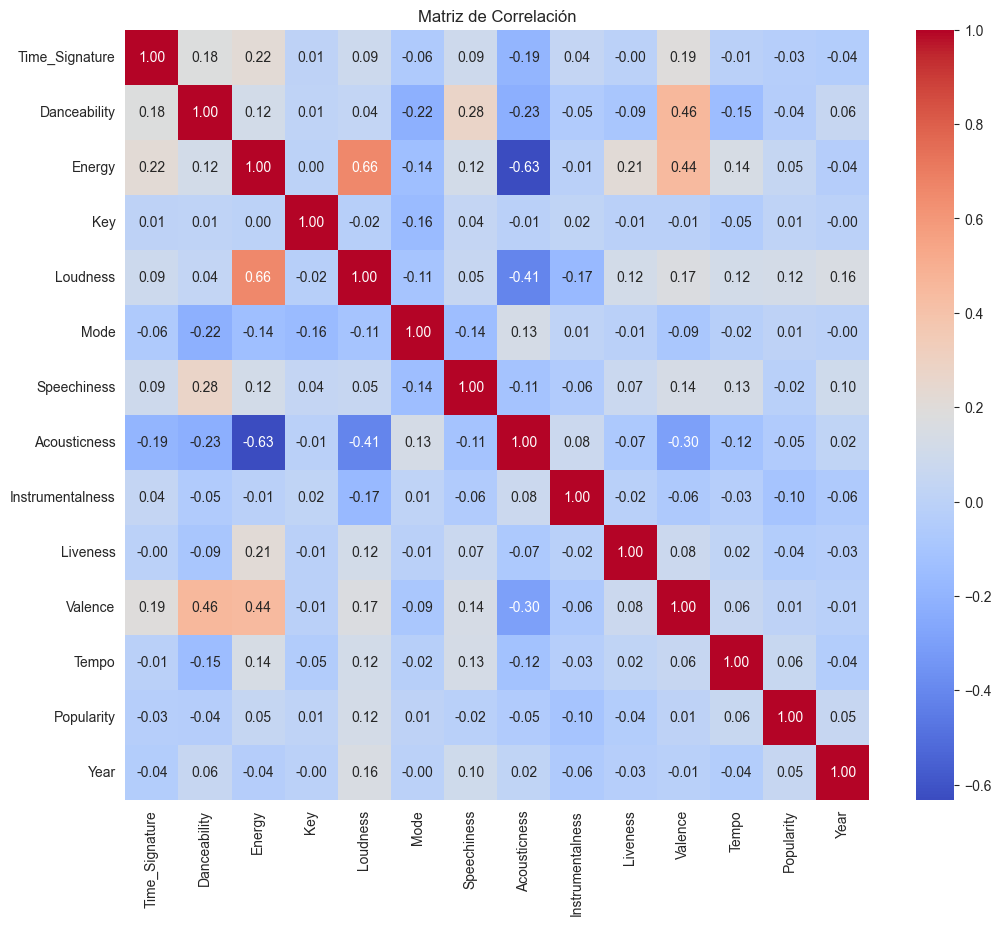

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt
#Primero dropeamos las columnas que no nos sirven(aquellas cualitativas)
copy_cuanti_ds = copy_covers_ds.drop(columns=['Track', 'Artist', 'Duration', 'Instrumentalness Type', 'Valence_groups', 'Popularity_groups', 'Energy_groups'])

# calculamos la matriz de correlación
correlation_matrix = copy_cuanti_ds.corr()
# la graficamos con un mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

Primero, veremos las relaciones que más llaman la atención
* Se puede ver que hay una correlación bastante alta entre ```Loudness``` y ```Energy```, cosa que chusmeamos en un análisis anterior
* También se aprecia una correlación inversamente grande entre ```Acousticness``` y ```Energy```. Tiene mucho sentido dado que, por lo general, una canción mas enérgica tiende a tener menos elementos acústicos<br>
Ahora bien, modelemos las correlaciones con la variable popularity(respuesta) con un gráfico de barras para analizarlo un poquito

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecciona solo las correlaciones con Popularity
popularity_correlations = correlation_matrix['Popularity'].drop('Popularity')

# Ordena las correlaciones de mayor a menor
sorted_correlations = popularity_correlations.sort_values(ascending=False)

# Crea un gráfico de barras para visualizar las correlaciones
plt.figure(figsize=(10, 6))
plt.grid(True)
sns.barplot(x=sorted_correlations.values, y=sorted_correlations.index)
plt.title('Correlaciones con Popularity')
plt.xlabel('Correlación')
plt.ylabel('Variable')
plt.xlim([-1, 1])
plt.show()

Como no tenemos ninguna correlación relevante de popularidad con alguna característica de las canciones, no podemos hacer regresión debido que no se cumple el supuesto de correlatividad entre la variable respuesta y las predictoras. Que lastima....
Sin embargo.....de la matriz de correlación y de análisis anteriores sabemos que ```Energy``` y ```Loudness``` están bastante correlacionadas(0.65), así que podríamos plantearnos esta nueva hipótesis ¿Se podrá predecir que tan ruidosa es la canción dependiendo de la energía que transmite?


Ya vimos una correlación relativamente alta entre ```Energy```(nuestra variable independiente) y ```Loudness``` (nuestra variable dependiente). Por lo que tendríamos que usar un scatter plot para ver gráficamente la relación entre las dos:

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(copy_covers_ds['Energy'], copy_covers_ds['Loudness'], alpha=0.5)
plt.xlabel('Energy')
plt.ylabel('Loudness')
plt.title('Energy vs Loudness')
plt.show()

El scatter plot muestra una tendencia logarítmica y levemente lineal. Canciones con alta Energy suelen ser más "intensas" y, por lo tanto, tienden a ser mezcladas con mayores niveles de Loudness, lo cual es esperado en muchos géneros musicales.  Este patrón sugiere que con una simple regresión lineal se podría capturar bastante bien la relación entre estas dos variables.<br>
 En este caso vamos a trabajar con el paquete ```statsmodels``` de Python, donde disponemos de la librería sm, que incluye varios modelos estándar de regresión. De ellos vamos a tomar OLS, sigla en inglés de Ordinary Least Squares, o mínimos cuadrados ordinarios.<br>
 Como vamos a probar con modelo de regresión lineal simple con una sola variable independiente, no es estrictamente necesario hacer algún tipo de estandarización de los datos

In [ ]:
import numpy as np
import statsmodels.api as sm

# Separamos nuestra variable independiente
X = copy_covers_ds['Energy']
# y nuestra variable objetivo (variable dependiente)
y = copy_covers_ds['Loudness']

# Agregamos una constante como característica, para estimar la ordenada al origen
X = sm.add_constant(X)
# Ajustamos el modelo
model = sm.OLS(y, X).fit()
#Imprimimos el resumen de los resultados
print(model.summary())

Funciona, ahora ¿Qué significa cada cosa? Vamos a desglosarlo:
* Coeficiente de determinación ```R-squared```:indica qué proporción de la varianza en la variable dependiente (o respuesta) es explicada por el modelo de regresión lineal. En este caso, el valor es del 0.429 lo que muestra que, en este caso, el modelo explica el 42.9% de la varianza total es decir que hay bastante varianza que no explicada, posiblemente de ruido o factores no incluidos en el modelo.
*  Significancia del modelo ```F-statistic```: Dice si la varianza explicada por el modelo (gracias a las variables independientes) es significativamente mayor que la varianza residual (o el "ruido" que no puede ser explicado por el modelo). Si el valor de F es alto, implica que la varianza explicada es considerablemente mayor que la varianza residual, lo que sugiere que el modelo es significativo. "Alto" es algo que por lo general es relativo entre una cosa y otra, así que lo que más nos va a interesar es el p-valor asociado al estadístico. En este caso, el p-valor es recontra bajo (p <<< 0.001), lo que indica que el modelo en su conjunto es significativo. Esto implica que Energy es útil para predecir Loudness con una confianza estadística alta.
* El coeficiente de ```Energy``` es 12.4991, lo que significa que por cada unidad que se incrementa la energía de la canción, la ruidosidad aumenta en proporción. Este coeficiente también es muy significativo ( p  <<< 0.001), lo que confirma la fuerte asociación entre ambas variables.<br>
* Estadístico ```Omnibus```: Estudia si hay desviaciones significativas en la asimetría y curtosis con respecto a la normalidad. Un  p -valor bajo ( p<0.05 ) sugiere que los residuos no son normales. En este caso nos dió 0, es decir que no se cumple el supuesto de normalidad de los residuos. 
* El test de ```Jarque-Bera``` también estudia la asimetría y la curtosis, pero usa una metodología diferente. Su  p -valor está marcado como Prob(JB), y también es bajo.

Para ver estas diferencias en asimetría y curtosis de forma gráfica podemos hacer el histograma de los residuos respecto a la distribución normal:



In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

from scipy.stats import norm

# Histograma de residuos
plt.hist(model.resid, bins=20, density=True)
# Ajustamos una curva normal a esos residuos
mu, std = norm.fit(model.resid)
# Graficamos la curva de la distribución normal
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

plt.xlabel("Residuales")
plt.ylabel("Frecuencia")
plt.title("Histograma de los residuos")
plt.legend(["Distribución normal", "Residuos"])
plt.show()

Se ve que aunque hay una silueta "acampanada", tenemos un desplazamiento leve hacia valores positivos, y una cola (la de la izquierda)<br>
Otra forma de estudiar la validez del modelo es representando gráficamente los valores ajustados por el modelo vs. los residuos. Deberíamos observar un comportamiento "en banda" alrededor del 0, sin demasiados errores por encima o debajo del 3 y el -3, respectivamente (porque en una normal estándar los valores por fuera del intervalo [-3, 3] son muy poco frecuentes). Si observamos un patrón diferente a eso, entonces estamos vulnerando alguno de los supuestos:

In [ ]:
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel("Valores ajustados")
plt.ylabel("Residuos")
plt.title("Valores adjustados vs. residuos")
plt.axhline(0, color='red', linestyle='--')
plt.yticks(range(-30, 10, 3))
plt.show()

Y acá vemos claramente que no se cumple con lo esperado, si bien tiene un forma aparentemente en banda, hay bastantes errores por fuera del [-3, 3]

Otra hipótesis caída :(, ¿Qué hacemos entonces?¿Se podrá predecir mejor Loudness si incorporamos más variables? Es posible. El tema está en cuáles son esas variables ideales para predecir la cantidad de decibelios que tendrá una canción. Indagando un poco por internet encontramos que otras posibles variables que influyen en ```Loudness``` pueden ser:
* ```Tempo```: Canciones con tempos más altos a menudo requieren más instrumentos percusivos y arreglos dinámicos, lo que puede contribuir a un mayor volumen percibido.
* ```Danceability```: Canciones con alta danceability suelen ser más rítmicas y podrían tener mayores niveles de loudness debido a beats marcados y repetitivos
* ```Instrumentalness```: Las canciones instrumentales, especialmente aquellas de géneros como música clásica o ambiental, tienden a tener niveles de loudness más bajos. Por el contrario, canciones con muchas voces y producción vocal suelen ser más ruidosas
*  ```Key y Mode```: Las canciones en modo mayor y tonalidades específicas (por ejemplo, tonalidades brillantes como C, D o G) pueden percibirse más "fuertes" debido a su resonancia.
*  ```Valence```: Canciones más alegres tienden a tener una producción más brillante y fuerte, mientras que las canciones tristes suelen ser más silenciosas y sutiles.

Primero vamos a ver como son las correlaciones de ```Loudness``` con esas variables

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecciona solo las correlaciones con Loudness
loudness_correlations = correlation_matrix['Loudness'].drop('Loudness')

# Ordena las correlaciones de mayor a menor
sorted_correlations = loudness_correlations.sort_values(ascending=False)

# Crea un gráfico de barras para visualizar las correlaciones
plt.figure(figsize=(10, 6))
plt.grid(True)
sns.barplot(x=sorted_correlations.values, y=sorted_correlations.index)
plt.title('Correlaciones con Loudness')
plt.xlabel('Correlación')
plt.ylabel('Variable')
plt.xlim([-1, 1])
plt.show()

Las más correlacionadas son ```Energy```, ```Valence```, ```Danceability```, ```Acousticness``` e ```Instrumentalness```. Vamos a hacer los scatter-plot para ver si vemos una relación aproximadamente lineal

In [ ]:
import matplotlib.pyplot as plt
import  numpy as np
#Instrumentalness vs Loudness
plt.figure(figsize=(8, 6))
#Calculamos el coeficiente de correlación con numpy
coeficiente_correlacion = np.corrcoef(copy_covers_ds['Loudness'], copy_covers_ds['Instrumentalness'])[0, 1]

plt.scatter(copy_covers_ds['Loudness'], copy_covers_ds['Instrumentalness'], label=f'Correlacion {coeficiente_correlacion}', alpha=0.5)
plt.xlabel('Loudness')
plt.ylabel('Instrumentalness')
plt.title('Instrumentalness vs Loudness')
plt.legend([f"Correlación: {coeficiente_correlacion:.4f}"], loc="upper left")
plt.show()

#Acousticness vs Loudness
plt.figure(figsize=(8, 6))
coeficiente_correlacion = np.corrcoef(copy_covers_ds['Loudness'], copy_covers_ds['Acousticness'])[0, 1]
plt.scatter(copy_covers_ds['Loudness'], copy_covers_ds['Acousticness'], label=f'Correlacion {coeficiente_correlacion}', alpha=0.5)
plt.xlabel('Loudness')
plt.ylabel('Acousticness')
plt.title('Acousticness vs Loudness')
plt.legend([f"Correlación: {coeficiente_correlacion:.4f}"], loc="upper left")
plt.show()

#Valence vs Loudness
plt.figure(figsize=(8, 6))
coeficiente_correlacion = np.corrcoef(copy_covers_ds['Loudness'], copy_covers_ds['Valence'])[0, 1]
plt.scatter(copy_covers_ds['Loudness'], copy_covers_ds['Valence'], label=f'Correlacion {coeficiente_correlacion}', alpha=0.5)
plt.xlabel('Loudness')
plt.ylabel('Valence')
plt.title('Valence vs Loudness')
plt.legend([f"Correlación: {coeficiente_correlacion:.4f}"], loc="upper left")
plt.show()




Como se puede apreciar, ninguna cumple con que el supuesto de correlación lineal. Por lo tanto, no podemos hacer regresión lineal múltiple. Quizá se pueda hacer algún otro tipo de análisis con regresión no lineal, pero como no fue un tema tratado en la materia, lo dejaremos acá por ahora😢

### Análisis de grupos con clustering

Podemos aplicar técnicas de clustering para identificar comportamiento común que nos permita agrupar canciones con características similares, lo que es útil para identificar géneros o subgrupos de música dentro de esta década icónica.
Sería útil seleccionar variables que determinen subgéneros musicales, como ```Danceability```, ```Energy```, ```Tempo```, ```Acousticness```, ```Instrumentalness``` y ```Valence```

Para identificar estos grupos podemos usar el algoritmo K-means. El mismo se basa en descubrir K centroides en los datos que me representen los diferentes agrupamientos que puedan llegar a existir, de manera iterativa y basándose en la distancia entre las muestras.
En Sklearn, el algoritmo de K-means se llama KMeans y viene dentro del paquete cluster. El hiperparámetro más importante es n_clusters, que no es más que el valor de K. Vamos a generar una primera partición en 4 clusters y ver los resultados que obtenemos.
Primero, normalizamos los datos dejar bien armado los campos del dataset. En este caso lo haremos utilizando normalización por rangos, según el valor mínimo/máximo de cada columna. Para eso vamos a usar la clase MinMaxScaler de Sklearn debido a su simpleza.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Seleccionamos las columnas numéricas para la normalización
numeric_cols = copy_covers_ds.select_dtypes(include=np.number).columns

# Creamos un objeto MinMaxScaler
scaler = MinMaxScaler()

# Ajustamos el scaler a los datos y transformamos los datos
copy_covers_ds[numeric_cols] = scaler.fit_transform(copy_covers_ds[numeric_cols])

# Imprimimos el DataFrame con los datos normalizados
copy_covers_ds.head()

Ahora si usamos K-means para encontrar los grupos

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd

# separamos las features de los nombres de los países
songs = copy_covers_ds['Track']
features_songs = copy_covers_ds.drop(columns=['Track', 'Artist', 'Duration'])

# inicializamos un objeto de la clase KMeans con el modelo
kmeans = KMeans(n_clusters=4, verbose=0, random_state=10)
# lo aplicamos sobre nuestros datos para hallar los centroides
kmeans.fit(features_songs)
# y obtenemos los clusters a los que fueron asignadas las muestras
clusters_kmeans = kmeans.predict(features_songs)

# Creamos un DataFrame con los países y los clusters asignados
cluster_df = pd.DataFrame({'Track': songs, 'Cluster': clusters_kmeans})

# Imprimimos los países de cada cluster
for cluster_num in range(4):
  print(f"\nCluster {cluster_num}:")
  print(cluster_df[cluster_df['Cluster'] == cluster_num]['Track'].tolist())

Si bien separa correctamente las canciones en los distintos clusters. Podemos representar el resultado en un scatter plot para apreciarlo mejor. Como tenemos una dimensionalidad alta, necesitaremos usar t-sne o PCA para trasladar los resultados a dos dimensiones.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Reducir la dimensionalidad de los datos usando t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(features_songs)

# Crear un DataFrame con los resultados de t-SNE y los clusters
tsne_df = pd.DataFrame({'x': tsne_results[:, 0], 'y': tsne_results[:, 1], 'Cluster': clusters_kmeans, 'Track': songs})

# Graficar los resultados de t-SNE, coloreando los puntos según el cluster
plt.figure(figsize=(10, 8))
for cluster_num in range(4):
  plt.scatter(tsne_df[tsne_df['Cluster'] == cluster_num]['x'], tsne_df[tsne_df['Cluster'] == cluster_num]['y'], label=f'Cluster {cluster_num}')

  # Seleccionamos 5 canciones para etiquetar en cada cluster
  songs_to_label = tsne_df[tsne_df['Cluster'] == cluster_num]['Track'].tolist()
  songs_to_label = songs_to_label[:5]

  for song in songs_to_label:
    row = tsne_df[(tsne_df['Cluster'] == cluster_num) & (tsne_df['Track'] == song)]
    if not row.empty:
      plt.text(row['x'].values[0], row['y'].values[0], song, fontsize=8)

plt.xlabel('Componente t-SNE 1')
plt.ylabel('Componente t-SNE 2')
plt.title('Resultados del clustering con K-means (t-SNE)')
plt.legend()
plt.show()


De una observamos que el cluster 2 está muy separado de los demás. Podemos indagar un poco sobre el por qué de está diferencia. Por ejemplo, podemos tomar algunas canciones del cluster 2 y compararlas con las de otros clusters

In [ ]:
import matplotlib.pyplot as plt

# Seleccionamos aleatoriamente 5 canciones del Cluster 2, y 5 de los otros clusters para la comparación
cluster_2_songs = tsne_df[tsne_df['Cluster'] == 2].sample(5, random_state=42)
other_clusters_songs = tsne_df[tsne_df['Cluster'] != 2].groupby('Cluster').apply(lambda x: x.sample(5, random_state=42)).reset_index(drop=True)

# Combinamos las canciones seleccionadas en un solo DataFrame
comparison_songs = pd.concat([cluster_2_songs, other_clusters_songs])

# Extraemos las características de las canciones seleccionadas
features_comparison = features_songs.loc[comparison_songs.index]

# Agregamos la columna de clusters y nombres de las canciones para identificación
features_comparison = features_comparison.assign(Cluster=comparison_songs['Cluster'].values, Track=comparison_songs['Track'].values)

# Seleccionamos solo las columnas numéricas para calcular la media
numeric_features_comparison = features_comparison.select_dtypes(include=[np.number])

# Agregamos de nuevo la columna Cluster para hacer la agrupación
numeric_features_comparison['Cluster'] = features_comparison['Cluster'].values

# Comparamos las características de cada canción, calculando la media de cada atributo por cluster
mean_features_by_cluster = numeric_features_comparison.groupby('Cluster').mean()

print("Promedio de las características por Cluster:")
print(mean_features_by_cluster)

# Visualizamos las diferencias en los atributos entre los clusters
# Seleccionamos algunos atributos para graficar
attributes_to_compare = ['Danceability', 'Energy', 'Loudness', 'Valence', 'Tempo', 'Popularity', 'Instrumentalness', 'Acousticness', 'Speechiness']

# Crear gráfico de barras para cada atributo
fig, axes = plt.subplots(nrows=len(attributes_to_compare), ncols=1, figsize=(10, 40))

for i, attribute in enumerate(attributes_to_compare):
    mean_features_by_cluster[attribute].plot(kind='bar', ax=axes[i], color=['blue', 'orange', 'green', 'red'])
    axes[i].set_title(f'Comparación del atributo {attribute} por cluster')
    axes[i].set_ylabel(attribute)
    axes[i].set_xlabel("Cluster")

plt.tight_layout()
plt.show()


Genial! Ahora a sentarnos a ver las diferencias más grandes entre los clusters:
* ```CLuster 0```: Poca lírica, muy instrumentales, muy populares, tempo medio-alto, baja positividad, muy enérgicas y bailables. Con esta descripción, podrían ser canciones de, por ejemplo, metal o electrónica
* ```Cluster 1```: Cantidad normal de lírica, con mucha instrumentación acústica, bastante populares, tempo medio-bajo, energía media y muy bailables. Podrían ser canciones estilo balada, románticas
*  ```Cluster 2```: Muy habladas, pocos elementos acústicos, nivel de popularidad media, tempo muy rápido, transmiten mucha positividad, bastantes ruidosas, enérgicas y bailables. Parecen ser canciones estilo rap, hip-hop
* ```Cluster 3```: Casi nada de lírica, muy acústicas, populares, tempo-medio, bastante alegres y ruidosas, enérgicas y no muy bailables, por ejemplo folk, jazz o blues.

Ahora bien, que hubiese pasado si elegíamos cantidad de clusters n = 3, o igual a 2, o igual a 5, etc. Para evitar tener que elegir la cantidad,podemos aplicar un algoritmo de Clustering jerárquico<br>
Tomarémos un enfoque aglomerativo(se toman diferentes pares de muestras y se unen según qué tan cerca se encuentren entre sí, hasta unirlas a todas en un único clúster), construyendo un dendograma de forma iterativa en donde se unen las muestras entre sí según se vayan poniendo en un mismo cluster, y donde se representan las uniones con una altura equivalente a la distancia euclidea entre los elementos que se unen.

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# generamos el clustering jerárquico
linked = linkage(copy_cuanti_ds, method='single')

# ploteamos el dendrograma
plt.figure(figsize=(30,7))
dendrogram(linked,
           orientation='top',
           labels=list(songs), # oko que hay que pasarle una lista
           distance_sort='descending',
           show_leaf_counts=True,
           leaf_font_size=10,
           truncate_mode='lastp', p=100) #Lo truncamos para visualizar los clusters más relevantes
plt.xlabel('Canciones')
plt.ylabel('Distancia euclídea')
plt.grid(True)
plt.show()

Las canciones que se encuentran cerca en el eje x son más similares entre sí. Si dos canciones están unidas a una altura baja, significa que tienen características muy parecidas. Por ejemplo, en el dendograma, se pueden apreciar canciones como "Runaway", "November Rain" y "Feels So Good" en un cluster separado del resto, esto indica que son muy distintas del resto de canciones. Le vamos a echar un ojo a ver si sabemos el porqué de esta diferencia

In [ ]:
copy_covers_ds[copy_covers_ds['Track'] == 'Feels So Good']

In [ ]:
copy_covers_ds[copy_covers_ds['Track'] == 'November Rain']

In [ ]:
copy_covers_ds[copy_covers_ds['Track'] == 'Runaway']

Al parecer, este cluster está lleno de canciones con mucha duración, se puede apreciar que las tres tiene valores cercanos a los 10min

Para obtener los clusters de una solución particular, debemos aplicar el algoritmo aglomerativo una vez más. Para hacerlo de otra forma, vamos a hacerlo ahora usando ```Sklearn```. Si lo particionaramos en 40, obtendríamos 3 clusters:lo pintado de verde, lo de azul y lo de naranja

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# creamos el objeto para el clustering aglomerativo, eliminamos affinity porque no es necesario con linkage='single'
agglomerative = AgglomerativeClustering(n_clusters=3, linkage='single')
# usamos fit predict para buscar los clusters y devolverlos
clusters_agglomerative = agglomerative.fit_predict(copy_cuanti_ds)

# imprimimos por pantalla los nombres de los países asignados a cada cluster
for k in np.unique(clusters_agglomerative):
  print('Cluster {}'.format(k))
  print(songs[clusters_agglomerative==k])
  print('======')

Ahora vamos a evaluar las que tan acertadas son estas soluciones de clustering que encontramos mediante el Índice de Davies Bouldin y el Coeficiente de silueta. Para ello usaremos la libreria ```SKLearn```.

In [ ]:
from sklearn.metrics import davies_bouldin_score, silhouette_score

# inicializamos listas con los resultados de cada algoritmo y los nombres de los
# algoritmos
clusters_to_compare = [clusters_kmeans, clusters_agglomerative]
clustering_methods = ['K-means', 'Hierarchical Clustering']

# inicializamos vectores donde iremos guardando los resultados
db_scores = np.zeros(len(clusters_to_compare))
silhouette_scores = np.zeros(len(clusters_to_compare))

# por cada uno de los métodos
for i in range(len(clusters_to_compare)):
  # calculamos las métricas
  db_scores[i] = davies_bouldin_score(copy_cuanti_ds, clusters_to_compare[i])
  silhouette_scores[i] = silhouette_score(copy_cuanti_ds, clusters_to_compare[i])
  # las imprimimos
  print(clustering_methods[i])
  print('DB score: {:.4f}'.format(db_scores[i]))
  print('Silhouette score: {:.4f}'.format(silhouette_scores[i]))
  print('----------')

# inicializamos un gráfico para cada métrica
fig, axes = plt.subplots(1, 2)
plt.subplots_adjust(wspace=0.5)
# graficamos el Davies Bouldin score
axes[0].bar(np.arange(db_scores.size), db_scores)
axes[0].set_title('Davies Boulding Score')
axes[0].set_xlabel('Clustering method')
axes[0].set_ylabel('Davies Boulding Score')
axes[0].set_xticks(np.arange(db_scores.size))
axes[0].set_xticklabels(clustering_methods, rotation=45)
axes[0].grid(True)
# y el Silhouette Score
axes[1].bar(np.arange(silhouette_scores.size), silhouette_scores)
axes[1].set_title('Silhouette Score')
axes[1].set_xlabel('Clustering method')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_xticks(np.arange(silhouette_scores.size))
axes[1].set_xticklabels(clustering_methods, rotation=45)
axes[1].grid(True)

plt.show()

Vemos que en este caso logramos que el método de clustering jerárquico supere significativamente al de K-means tanto en términos del Davies Boulding score como del Silhouette Score. Esto implica que los clusters que encontramos con este método están mejor separados entre sí y tienen más densidad interna. 